# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

El proyecto estará dividido de la siguiente manera:

### Parte A: Exploración de datos
- Cargo todas las librerías para el proyecto completo
- Evaluación de datos faltantes
- Evaluación de la distribución de las estrellas 
- Homogeneización del idioma 
- Recuento de reviews por tipo de categoría de producto
- Rating promedio por categoría de productos
- Recuento de revisores diferentes
- Tranformaciones de datos: 
    - Elimino los emojis 
    - Elimino los números 
    - Llevo a minúsculas, elimino puntuaciones, elimino stop words y hago la lemmatización.
    - Cambio vocales con acento por vocales sin acento
    - Tokenización

Responderé a las siguientes preguntas:


- 1) ¿Cuáles son las palabras asociadas a una buena puntuación? ¿Y a una mala puntuación?


- 2) ¿Cuándo se escribe mas? ¿Con buenas calificaciones o con malas?

### Parte B: Modelo de Machine Learning

- 1) Haz todas las transformaciones de datos que consideres necesarias. Justifica.


- 2) Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.


- 3) Elige un modelo benchmark y compara tus resultados con este modelo.


- 4) Optimiza los hiperparámetros de tu modelo.


- 5) Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

### Parte C: Investigación. Para pensar, investigar y, opcionalmente, implementar

- 1) ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor


- 2) ¿Hay algo que te gustaría investigar o probar?

     Análisis de sentimientos...¿en español? 

# Parte A: exploración de datos

- Cargo todas las librerías para el proyecto completo

In [1]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
import itertools
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import matplotlib.gridspec as gridspec
from sklearn.feature_extraction.text import TfidfVectorizer
import gc 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import winsound
from sentiment_analysis_spanish import sentiment_analysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.


In [2]:
#Para notificar el final de un proceso (útil para aquellos de larga duración)
duration = 1000  # milliseconds
freq = 440  # Hz

- Cargo todos los dataset (TRAIN, DEV, TEST)

In [3]:
#Cargo el dataset TRAIN
dataset_train = pd.read_json('dataset_es_train.json', lines=True)
print(dataset_train.shape)
dataset_train.head()

(200000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [4]:
#Cargo el dataset DEV
dataset_dev = pd.read_json('dataset_es_dev.json', lines=True)
print(dataset_dev.shape)
dataset_dev.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
#Cargo el dataset TEST
dataset_test = pd.read_json('dataset_es_test.json', lines=True)
print(dataset_test.shape)
dataset_test.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


- **Conclusión 1:** 

 - los tres datasets, poseen los mismos número de columnas y los mismos features, las cuales son: `review_id`, `product_id`, `reviewer_id`,	`stars`, `review_body`, `review_title`, `language` y `product_category`.
 
 - los tres datasets, poseen tres columnas en idioma inglés (`product_id`,`reviewer_id` y `product_category`) y el resto en español.
 
 - tanto el dataset DEV como TEST corresponden al 2.5% de los datos en relación al dataset de TRAIN.

- Evaluación de datos faltantes

In [6]:
#Función para determinar valores faltantes por columnas
def missing_values (data):
    return data.isna().sum()

In [7]:
#Valores faltantes por columnas en el dataset TRAIN
missing_values (dataset_train)

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [8]:
#Valores faltantes por columnas en el dataset DEV
missing_values (dataset_dev)

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [9]:
#Valores faltantes por columnas en el dataset TEST
missing_values (dataset_test)

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

- **Conclusión 2:** 

 - los tres datasets, no poseen datos faltantes. 


- Evaluación de la distribución de las estrellas 

In [10]:
#Cuento el número de casos de acuerdo a las estrellas otorgadas
def count_stars (data_, data):
    plt.figure(figsize = (6,6))
    plot = sns.countplot(data['stars'], palette = 'magma')
    plot.set_title(f'Gráfico para el dataset {data_}')
    plt.xlabel('Estrellas')
    plt.ylabel('Cantidad')
    plt.show()

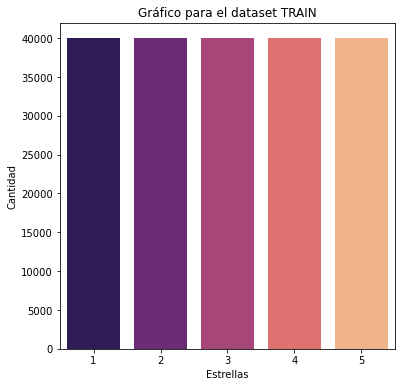

In [11]:
#Cuento el número de casos de acuerdo a las estrellas otorgadas en el datatset TRAIN
count_stars ('TRAIN', dataset_train)

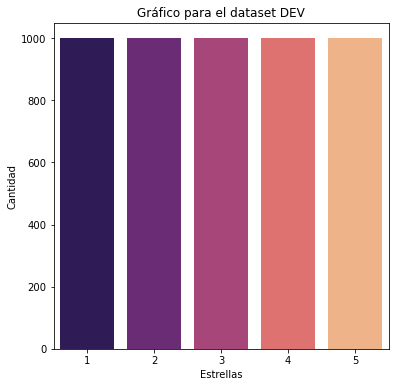

In [12]:
#Cuento el número de casos de acuerdo a las estrellas otorgadas en el datatset DEV
count_stars ('DEV', dataset_dev)

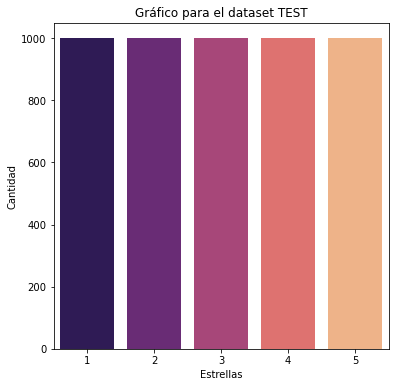

In [13]:
#Cuento el número de casos de acuerdo a las estrellas otorgadas en el datatset TEST
count_stars ('TEST', dataset_test)

- **Conclusión 3:** 

 - la estrellas están igualmente distribuidas en sus 5 categorías (40000 instancias en cada clase en el datatset TRAIN y 1000 instancias a cada clase en los dataset DEV y TEST).

- Homogeneización del idioma 

Ya que tanto, el título de la crítica (`review_title`) como el cuerpo de la crítica (`review_body`) están en idioma español, decidí reemplazar y traducir la columna `product_category`al español. Para ello, determiné las categorías que existían en esa columna, e hice un diccionario para reemplazar las palabras. Esto lo apliqué para los tres dataset: TRAIN, DEV y TEST.

In [14]:
#Categorías únicas en product_category
dataset_train['product_category'].unique()

array(['electronics', 'drugstore', 'wireless', 'shoes', 'home', 'luggage',
       'office_product', 'kitchen', 'pc', 'toy', 'industrial_supplies',
       'furniture', 'pet_products', 'sports', 'home_improvement',
       'grocery', 'lawn_and_garden', 'beauty', 'other', 'watch',
       'automotive', 'book', 'apparel', 'video_games', 'camera',
       'baby_product', 'personal_care_appliances', 'jewelry',
       'digital_ebook_purchase', 'musical_instruments'], dtype=object)

In [15]:
#Creo un diccionario para traducir las palabras de inglés a español en la columna 'product_category'
dictionary = {'electronics': 'electrónicos', 'drugstore': 'farmacia',
              'wireless': 'inalámbrico', 'shoes': 'zapatos', 'home': 'hogar',
              'luggage': 'equipaje', 'office_product': 'oficina', 'kitchen': 'cocina',
              'pc': 'computación', 'toy': 'juguetes',
              'industrial_supplies': 'artículos industriales', 'furniture': 'muebles',
              'pet_products': 'mascotas', 'sports': 'deportes',
              'home_improvement': 'mejoras del hogar', 'grocery': 'comestibles',
              'lawn_and_garden': 'jardinería', 'beauty': 'belleza', 'other': 'otros',
              'watch': 'relojes', 'automotive': 'automóviles', 'book': 'libros',
              'apparel': 'ropa', 'video_games': 'videojuegos', 'camera': 'cámaras',
              'baby_product': 'bebés', 'personal_care_appliances': 'aparátos de cuidado personal',
              'jewelry': 'joyería', 'digital_ebook_purchase': 'libros electronicos',
              'musical_instruments': 'instrumentos musicales'}

In [16]:
#Reemplazo estos valores en el dataset TRAIN
dataset_train_es = dataset_train.copy()
dataset_train_es['product_category'].replace(dictionary, inplace = True)
dataset_train_es.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electrónicos
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electrónicos
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,farmacia
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,inalámbrico
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,zapatos


In [17]:
#Reemplazo estos valores en el dataset DEV
dataset_dev_es = dataset_dev.copy()
dataset_dev_es['product_category'].replace(dictionary, inplace = True)

In [18]:
#Reemplazo estos valores en el dataset TEST
dataset_test_es = dataset_test.copy()
dataset_test_es['product_category'].replace(dictionary, inplace = True)

- Recuento de reviews por tipo de categoría de producto

In [19]:
#Función para hacer el recuento por categoría de producto
def rev_product_category(dataset, data):
    plt.figure(figsize = (10,10))
    sns.countplot(data = dataset, x = 'product_category', order = dataset['product_category'].value_counts().index, palette = 'magma')
    plt.xticks(rotation = 90, fontsize = 'large')
    plt.yticks(fontsize = 'large')
    plt.title(f'Gráfico de barras: categoría de productos {data}\n', fontsize = 'x-large')
    plt.xlabel('Categoría de producto', fontsize = 'large')
    plt.ylabel('Cantidad', fontsize = 'large')

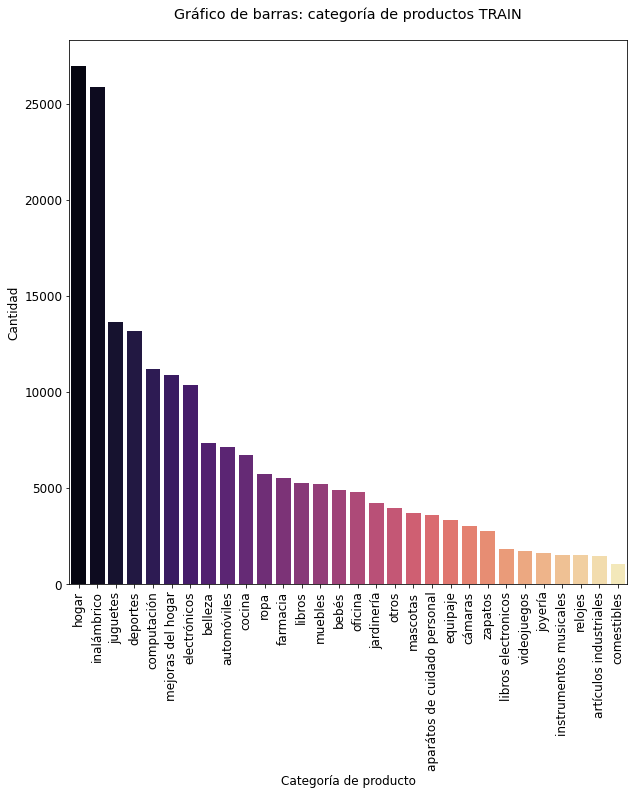

In [20]:
#Recuento para el dataset TRAIN
rev_product_category (dataset_train_es, 'TRAIN')

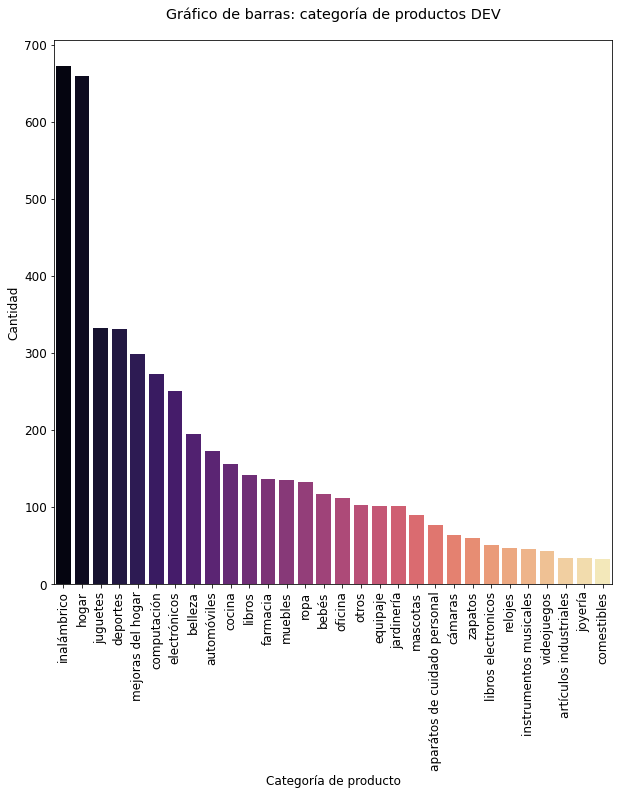

In [21]:
#Recuento para el dataset DEV
rev_product_category (dataset_dev_es, 'DEV')

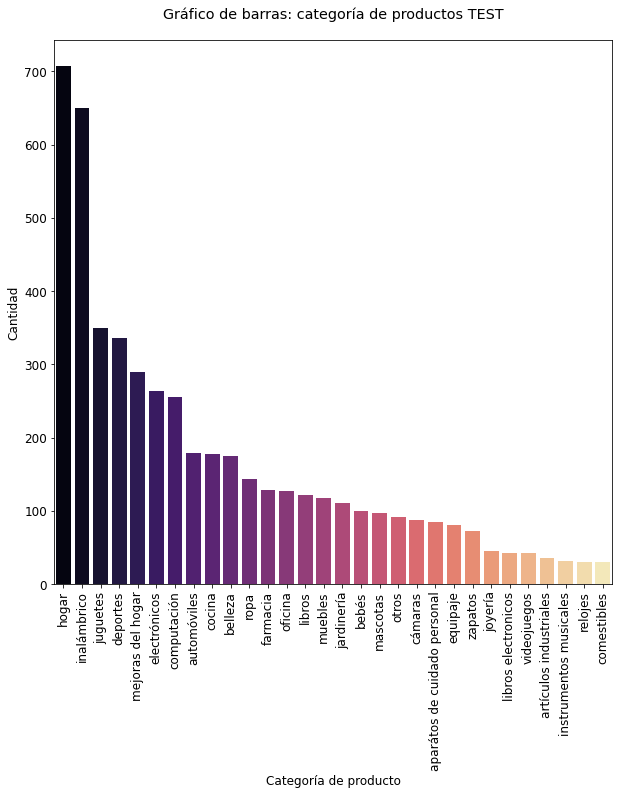

In [22]:
#Recuento para el dataset TEST
rev_product_category (dataset_test_es, 'TEST')

- **Conclusión 4:** 

 - Los tres datasets, tienen un mayor número de comentarios, para los productos referidos a: hogar, inalámbricos, juguetes y deportes.

- Rating promedio por categoría de productos

In [23]:
#Función para el recuento promedio por categoría de productos
def rec_rating_prod(dataset, data):
    plt.rcParams["figure.figsize"] = (10,6)
    rating_train = dataset.groupby('product_category')[['stars']].mean()
    rating_train = rating_train.sort_values(by = 'stars', ascending = False)
    rating_train.plot(kind = 'bar', color = 'purple')
    plt.xticks(rotation = 90, fontsize = 'large')
    plt.yticks(fontsize = 'large')
    plt.ylabel('Estrellas', fontsize = 'large')
    plt.xlabel('Categoría de producto', fontsize = 'large')
    plt.title (f'Gráfico de barras: promedio de calificación por categoría de productos ({data}) \n', fontsize = 'x-large')
    plt.show()
    


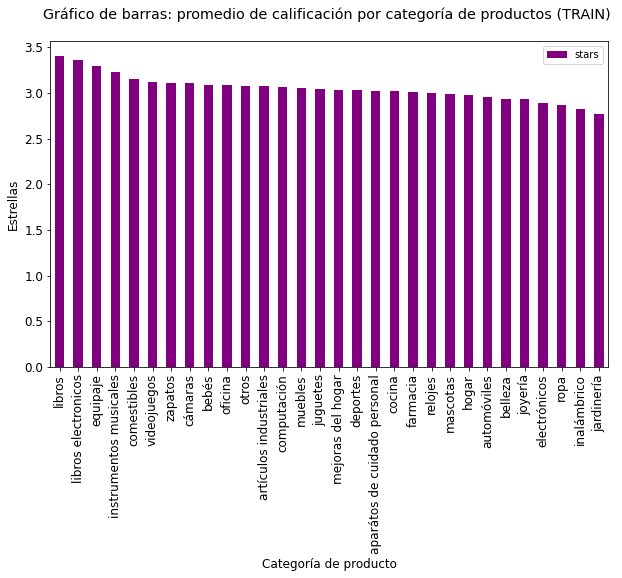

In [24]:
#Recuento para el dataset TRAIN
rec_rating_prod (dataset_train_es, 'TRAIN')

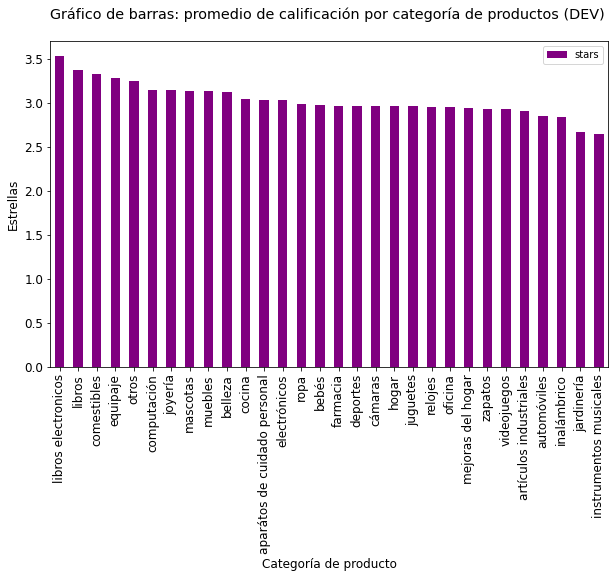

In [25]:
#Recuento para el dataset DEV
rec_rating_prod (dataset_dev_es, 'DEV')

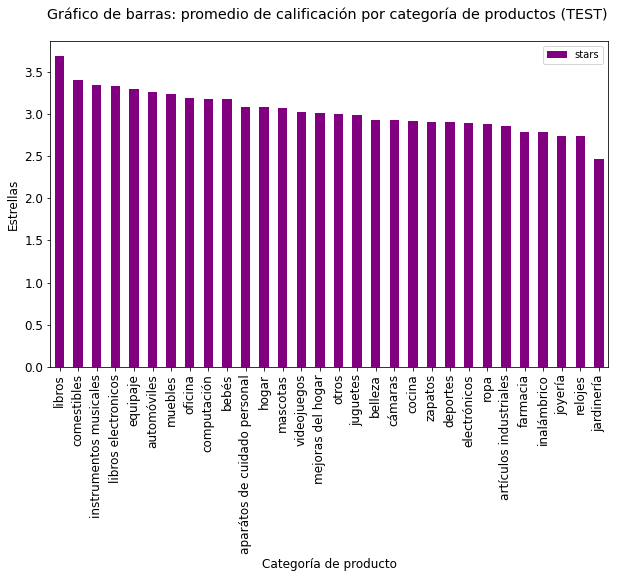

In [26]:
#Recuento para el dataset TEST
rec_rating_prod (dataset_test_es, 'TEST')

- **Conclusión 5:** 

 - El dataset train, tiene mejores puntuaciones promedio en los tipos de productos: libros, libros electrónicos y equipajes. Las peores puntuaciones promedios para este dataset fueron las categorías: ropa, inalambrico y jardinería.
 
 - El dataset dev, tiene mejores puntuaciones promedio en los tipos de productos: libros electrónicos, libros y comestibles. Las peores puntuaciones promedios para este dataset fueron las categorías: jardinería e instrumentos musicales.
  
  - El dataset test, tiene mejores puntuaciones promedio en los tipos de productos: libros, comestibles e instrumentos musicales. Las peores puntuaciones promedios para este dataset fueron las categorías: joyería, relojes y jardinería.

- Recuento de revisores diferentes

In [27]:
#Recuento para el dataset TRAIN
reviewers_train = dataset_train_es['reviewer_id'].nunique()
print(reviewers_train)

179076


In [28]:
#Recuento para el dataset DEV
reviewers_dev = dataset_dev_es['reviewer_id'].nunique()
print(reviewers_dev)

4982


In [29]:
#Recuento para el dataset TEST
reviewers_test = dataset_test_es['reviewer_id'].nunique()
print(reviewers_test)

4988


- **Conclusión 6:** 

- Los tres datasets, poseen usuarios repetidos (usuarios que han evaluado mas de 1 producto). 

- Columnas a usar 

Basado en la información que contienen, las columnas con las que trabajaré son: `stars`,`review_body`, `review_title`y `product_category`.

Por otro, lado decidí fusionar la información contenida en `review_title` y en `review_body` para poseer todo el texto junto y poder realizar el análisis conjunto de toda la informaicón contenida en ellos.

In [30]:
#Combinar el texto en una sola columna:review_data y review_body en review_title_body para TRAIN
dataset_train_es['review_title_body']  = dataset_train_es['review_title']+' '+dataset_train_es['review_body']
del dataset_train_es['review_id']
del dataset_train_es['product_id']
del dataset_train_es['reviewer_id']
del dataset_train_es['review_body']
del dataset_train_es['review_title']
del dataset_train_es['language']

#Re-defino el dataset
dataset_train = dataset_train_es.copy()
dataset_train

,stars,product_category,review_title_body
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...
2,1,farmacia,solo llega una unidad cuando te obligan a comp...
3,1,inalámbrico,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada
...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...
199997,5,ropa,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo


In [31]:
#Combinar el texto en una sola columna:review_data y review_body en review_title_body para DEV
dataset_dev_es['review_title_body']  = dataset_dev_es['review_title']+' '+dataset_dev_es['review_body']
del dataset_dev_es['review_id']
del dataset_dev_es['product_id']
del dataset_dev_es['reviewer_id']
del dataset_dev_es['review_body']
del dataset_dev_es['review_title']
del dataset_dev_es['language']

#Re-defino el dataset
dataset_dev = dataset_dev_es.copy()

In [32]:
#Combinar el texto en una sola columna:review_data y review_body en review_title_body para TEST
dataset_test_es['review_title_body']  = dataset_test_es['review_title']+' '+dataset_test_es['review_body']
del dataset_test_es['review_id']
del dataset_test_es['product_id']
del dataset_test_es['reviewer_id']
del dataset_test_es['review_body']
del dataset_test_es['review_title']
del dataset_test_es['language']

#Re-defino el dataset
dataset_test = dataset_test_es.copy()


- Normalización de los dataset

Consiste en llevar todo el texto a un formato común. Entre las acciones se incluyen: eliminar emojis, eliminar puntuaciones, eliminar palabras frecuentes o llamadas `stop words`, llevar a minúsculas, tokenizar (extraer oraciones o palabras dentro de un texto) y llevar las palabras a su raíz, mediante derivación regresiva, es decir, eliminando afijos de las palabras y encontrar la palabra raíz (palabra: increases --> incres) o mediante lematización, algo similar a la derivación regresiva, pero mas del mundo real (palabra: increases --> increase). 

- Elimino los emojis y emoticones

Eliminar los emojis para quedarme solo con palabras

In [33]:
#Elimino los emojis de dataset TRAIN
dataset_train['review_title_body'] = dataset_train['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
dataset_train

,stars,product_category,review_title_body
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...
2,1,farmacia,solo llega una unidad cuando te obligan a comp...
3,1,inalámbrico,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada
...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...
199997,5,ropa,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo


In [34]:
#Elimino los emojis del dataset DEV
dataset_dev['review_title_body'] = dataset_dev['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [35]:
#Elimino los emojis del dataset TEST
dataset_test['review_title_body'] = dataset_test['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

- Elimino los números 

En el dataset, solo quería quedarme con palabras, por lo que la existencia de números consideraba que no iban a aportar información y por ello los quité.

In [36]:
no_number_train=[]
for review in dataset_train.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_train.append(review)

In [37]:
dataset_train['review_title_body'] = no_number_train

In [38]:
no_number_dev=[]
for review in dataset_dev.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_dev.append(review)

In [39]:
dataset_dev['review_title_body'] = no_number_dev

In [40]:
no_number_test=[]
for review in dataset_test.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_test.append(review)

In [41]:
dataset_test['review_title_body'] = no_number_test

- Llevo a minúsculas, elimino puntuaciones, elimino `stop words`y hago la lemmatización. 

**NOTA**: Para realizar toda esta parte utilicé la librería spaCy. Decidí usar esta librería, ya que además de ser la recomendada para esta sección, pude probar otras alternativas, pero el mejor resultado lo obtuve con esta librería. 

**NOTA 2:** el modelo que decidí utlizar de la librería spaCy es 'es_core_news_lg'. La librería ofrece tres modelos para el idioma español: los modelos centrales sm, md y lg de spaCy se entrenaron con los mismos datos en las mismas condiciones. La única diferencia son los vectores que se incluyen, que se utilizan como características y, por lo tanto, tienen un impacto en la precisión del modelo.

**NOTA 3:** En el idioma español, dentro de las `stop words`se incluían palabras como **bueno, buena**. Decidí considerar estas palabras como **'no stop words'** ya que considero que pueden ser palabras claves al momento de analizar cuáles palabras están mas repetidas de acuerdo a la calificación. 

In [42]:
#Imprimo las stopwords
stops = spacy.lang.es.stop_words.STOP_WORDS
#stops

**NOTA 4:** basándome en haber corrido varias veces la función que descibo en la siguiente celda y haber analizado los resultados subsiguientes, decido incorporar otras palabras, como si fueran stop words (**'otros'**). 

In [43]:
#Función patra llevar a minúsculas, eliminar stopwords, puntuaciones y lemmatizar

nlp = spacy.load('es_core_news_lg')

def normalize(comment, lowercase, remove_stopwords):
    
    punctuations = string.punctuation
    stops = spacy.lang.es.stop_words.STOP_WORDS
    non_stops = ['bueno','buena']
    otros = ['y', 'e', 'a', 'o', 'para', 'pare', 'paro', 'como', 'q','..','...','....', '.....','.......', '...........','¡','¿']

    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if word.text not in non_stops:
            if not remove_stopwords or (remove_stopwords and word.text not in stops): 
                if word.text not in punctuations:
                    if word.text not in otros:
                        lemma = word.lemma_.strip()
                        lemmatized.append(lemma)
        elif word.text in non_stops:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
            
    return " ".join(lemmatized)

In [44]:
#Aplico la función normalize para TRAIN y creo la columna clean
dataset_train['clean'] = dataset_train['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)
dataset_train

,stars,product_category,review_title_body,clean
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...
2,1,farmacia,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...
3,1,inalámbrico,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar
...,...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar batería retice...
199997,5,ropa,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo


In [45]:
#Aplico la función normalize para DEV y creo la columna clean
dataset_dev['clean'] = dataset_dev['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)

In [46]:
#Aplico la función normalize para TEST y creo la columna clean
dataset_test['clean'] = dataset_test['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)

In [47]:
winsound.Beep(freq, duration)

- Cambio vocales con acento por vocales sin acento

En el caso del idioma español, es importante quitar los acentos, ya que escribir **batería** o **bateria**, serían la misma palabra, pero a nivel de análisis, serían consideradas como dos palabras diferentes.

In [48]:
#Quito los acentos al dataset TRAIN
dataset_train['clean'] = dataset_train['clean'].str.replace(u"á", "a")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"é", "e")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"í", "i")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ó", "o")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ú", "u")

In [49]:
#Quito los acentos al dataset DEV
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"á", "a")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"é", "e")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"í", "i")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ó", "o")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ú", "u")

In [50]:
#Quito los acentos al dataset TEST
dataset_test['clean'] = dataset_test['clean'].str.replace(u"á", "a")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"é", "e")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"í", "i")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"ó", "o")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"ú", "u")

- Tokenización 

In [51]:
#Función para tokenizar y generar una lista con las palabras tokenizadas
def tokenizar_lista(data):
    nombre_lista = []
    for i in range(data.shape[0]):
        token = data.iloc[i].clean
        token = nlp(token) 
        nombre_lista.append(token)
    return nombre_lista

In [52]:
#Aplico tokenizar_lista en TRAIN
lista_token_train = tokenizar_lista(dataset_train)

In [53]:
#Aplico tokenizar_lista en DEV
lista_token_dev = tokenizar_lista(dataset_dev)

In [54]:
#Aplico tokenizar_lista en TEST
lista_token_test = tokenizar_lista(dataset_test)

In [55]:
#Creo la columna token en TRAIN
dataset_train['token'] = lista_token_train
dataset_train

,stars,product_category,review_title_body,clean,token
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,"(television, nevir, bueno, ka, pantalla, mesar..."
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,"(dinero, tirar, basura, comprar, horrible, ten..."
2,1,farmacia,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,"(llegar, unidad, obligar, comprar, obligar, co..."
3,1,inalámbrico,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,"(producto, recibir, entrar, descalificar, vend..."
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,"(devolver, llegar, co, tallar, equivocar)"
...,...,...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,"(describir, mandar, funcionar, perfectamente, ..."
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,"(funcionar, perfectamente, comprar, bateria, r..."
199997,5,ropa,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,"(bueno, calidad, bueno, calidad, satisfacer, c..."
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,"(recomendar, perfecto, cumplir, hijo)"


In [56]:
#Creo la columna token en DEV
dataset_dev['token'] = lista_token_dev

In [57]:
#Creo la columna token en TEST
dataset_test['token'] = lista_token_test

In [58]:
#Valores faltantes por columnas en el dataset TRAIN
missing_values (dataset_train)

stars                0
product_category     0
review_title_body    0
clean                0
token                0
dtype: int64

In [59]:
#Valores faltantes por columnas en el dataset DEV
missing_values (dataset_dev)

stars                0
product_category     0
review_title_body    0
clean                0
token                0
dtype: int64

In [60]:
#Valores faltantes por columnas en el dataset TEST
missing_values (dataset_test)

stars                0
product_category     0
review_title_body    0
clean                0
token                0
dtype: int64

- Hasta el momento, hice la limpieza y adecuación de los datasets para poder trabajar con ellos. 

### A continuación, responderé algunas preguntas, basadas en el dataset TRAIN:

**1)** ¿Cuáles son las palabras asociadas a una buena puntuación? ¿Y a una mala puntuación?

Para ello, realizaré gráficos de barras, de las 30 palabras más frecuentes, de acuerdo a su puntuación.

In [61]:
#Dataset para 5 estrellas
dataset_5_stars = dataset_train[dataset_train.stars == 5]

#Dataset para 4 estrellas
dataset_4_stars = dataset_train[dataset_train.stars == 4]

#Dataset para 3 estrellas
dataset_3_stars = dataset_train[dataset_train.stars == 3]

#Dataset para 2 estrellas
dataset_2_stars = dataset_train[dataset_train.stars == 2]

#Dataset para 1 estrellas
dataset_1_stars = dataset_train[dataset_train.stars == 1]

- Realizo la tokenización

In [62]:
#Tokenizar y generar una lista con las palabras tokenizadas para 5 estrellas
lista_token_5 = tokenizar_lista(dataset_5_stars)

#Tokenizar y generar una lista con las palabras tokenizadas para 4 estrellas
lista_token_4 = tokenizar_lista(dataset_4_stars)

#Tokenizar y generar una lista con las palabras tokenizadas para 3 estrellas
lista_token_3 = tokenizar_lista(dataset_3_stars)

#Tokenizar y generar una lista con las palabras tokenizadas para 2 estrellas
lista_token_2 = tokenizar_lista(dataset_2_stars)

#Tokenizar y generar una lista con las palabras tokenizadas para 1 estrellas
lista_token_1 = tokenizar_lista(dataset_1_stars)

In [63]:
#Función para convertir una lista de listas en una única lista
def only_list(data_lista):   
    data_lista = list(itertools.chain(*data_lista))
    #Para hacer la lista, como una lista de string
    lista_de_tokens = [i.text for i in data_lista]
    return lista_de_tokens

In [64]:
#Convertir una lista de listas en una única lista para 5 estrellas
list_of_token_5 = only_list(lista_token_5)

#Convertir una lista de listas en una única lista para 4 estrellas
list_of_token_4 = only_list(lista_token_4)

#Convertir una lista de listas en una única lista para 3 estrellas
list_of_token_3 = only_list(lista_token_3)

#Convertir una lista de listas en una única lista para 2 estrellas
list_of_token_2 = only_list(lista_token_2)

#Convertir una lista de listas en una única lista para 1 estrellas
list_of_token_1 = only_list(lista_token_1)

In [65]:
#Cuento la frecuencia de palabras en la lista de 5 estrellas
word_freq_5 = Counter(list_of_token_5)

#Cuento la frecuencia de palabras en la lista de 4 estrellas
word_freq_4 = Counter(list_of_token_4)

#Cuento la frecuencia de palabras en la lista de 3 estrellas
word_freq_3 = Counter(list_of_token_3)

#Cuento la frecuencia de palabras en la lista de 2 estrellas
word_freq_2 = Counter(list_of_token_2)

#Cuento la frecuencia de palabras en la lista de 1 estrella
word_freq_1 = Counter(list_of_token_1)

In [66]:
#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para 5 estrellas
df_word_freq_5 = pd.DataFrame(list(word_freq_5.items()), columns = ['Palabra','Frecuencia'])

#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para 4 estrellas
df_word_freq_4 = pd.DataFrame(list(word_freq_4.items()), columns = ['Palabra','Frecuencia'])

#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para 3 estrellas
df_word_freq_3 = pd.DataFrame(list(word_freq_3.items()), columns = ['Palabra','Frecuencia'])

#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para 2 estrellas
df_word_freq_2 = pd.DataFrame(list(word_freq_2.items()), columns = ['Palabra','Frecuencia'])

#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para 1 estrella
df_word_freq_1 = pd.DataFrame(list(word_freq_1.items()), columns = ['Palabra','Frecuencia'])

In [67]:
# Ordena la frecuencias de palabras de manera ascendente para las 5 estrellas
df_word_freq_5.sort_values('Frecuencia', inplace = True, ascending = False)

# Ordena la frecuencias de palabras de manera ascendente para las 4 estrellas
df_word_freq_4.sort_values('Frecuencia', inplace = True, ascending = False)

# Ordena la frecuencias de palabras de manera ascendente para las 3 estrellas
df_word_freq_3.sort_values('Frecuencia', inplace = True, ascending = False)

# Ordena la frecuencias de palabras de manera ascendente para las 2 estrellas
df_word_freq_2.sort_values('Frecuencia', inplace = True, ascending = False)

# Ordena la frecuencias de palabras de manera ascendente para 1 estrella
df_word_freq_1.sort_values('Frecuencia', inplace = True, ascending = False)

In [68]:
# Reseteo el index en cada dataset
df_word_freq_5.reset_index(drop = True, inplace=True)

df_word_freq_4.reset_index(drop = True, inplace=True)

df_word_freq_3.reset_index(drop = True, inplace=True)

df_word_freq_2.reset_index(drop = True, inplace=True)

df_word_freq_1.reset_index(drop = True, inplace=True)

In [69]:
#Función para hacer el gráfico de frecuencia de palabras 
def plot_frequent_words (num, data):
    plt.figure(figsize = (15,8))
    plot = sns.barplot(x  = data.iloc[:30].Palabra, y = data.iloc[:30].Frecuencia, palette = 'magma')
    for item in plot.get_xticklabels():
        item.set_rotation(90)    
    plot.set_title(f'Gráfico para {num} estrellas')
    plt.show()

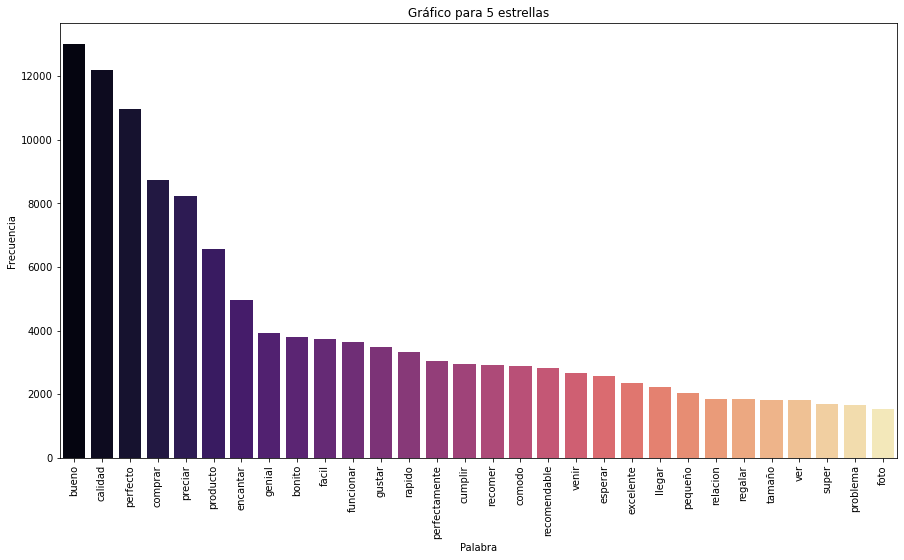

In [70]:
#Gráfico de frecuencia de palabras para 5 estrellas
plot_frequent_words ('5', df_word_freq_5)

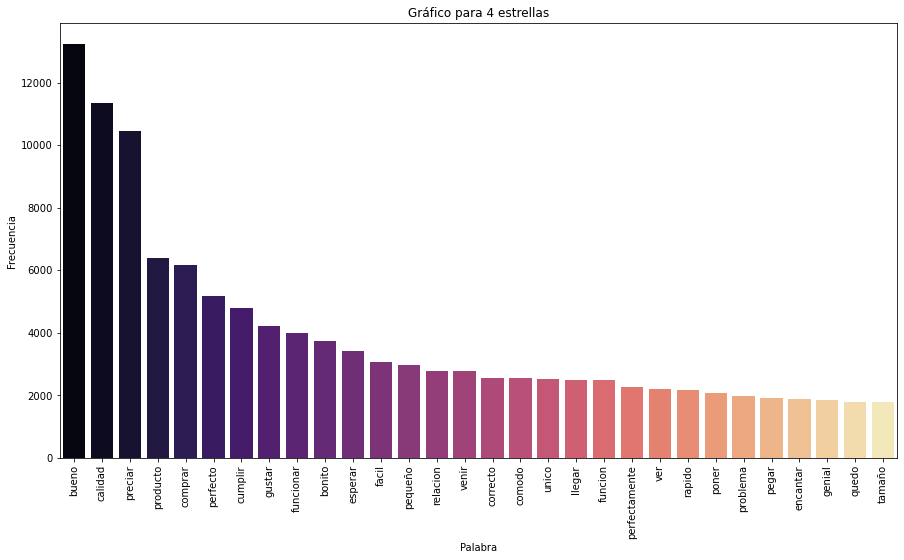

In [71]:
#Gráfico de frecuencia de palabras para 4 estrellas
plot_frequent_words ('4', df_word_freq_4)

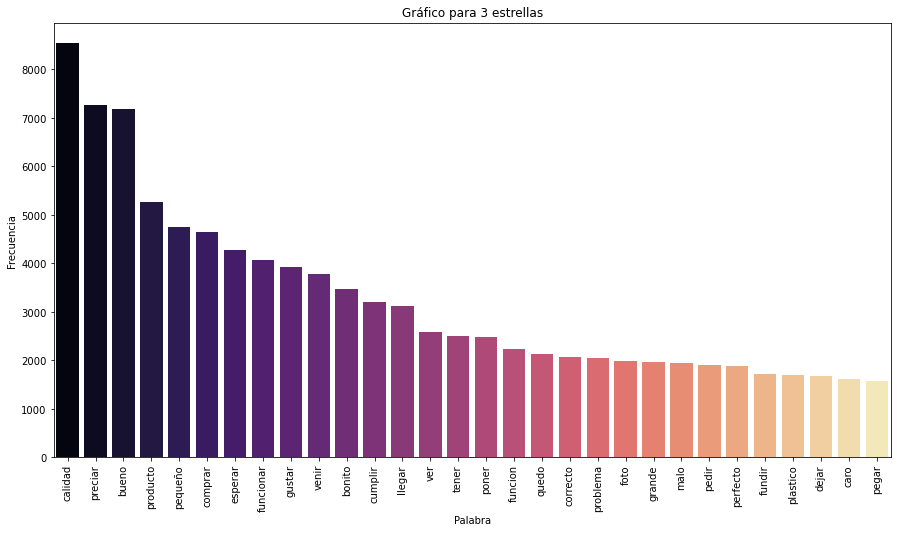

In [72]:
#Gráfico de frecuencia de palabras para 3 estrellas
plot_frequent_words ('3',df_word_freq_3)

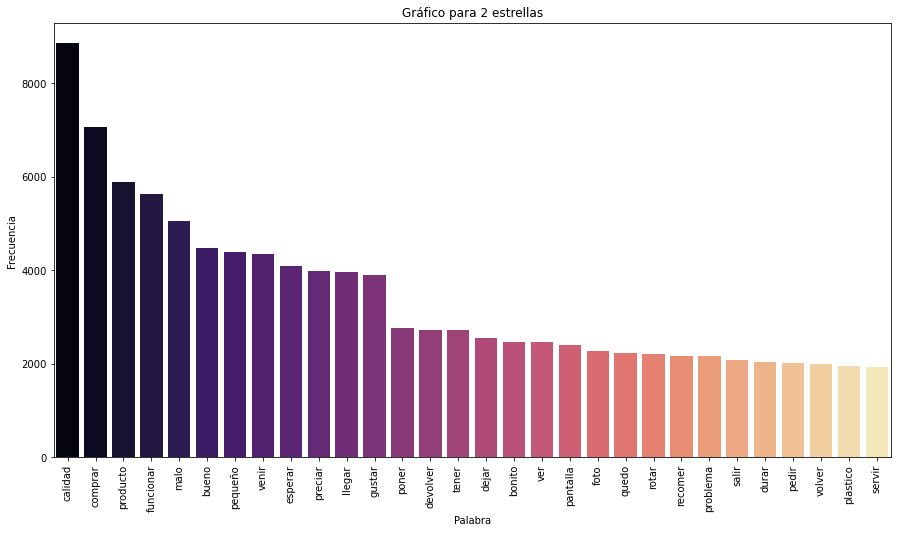

In [73]:
#Gráfico de frecuencia de palabras para 2 estrellas
plot_frequent_words ('2', df_word_freq_2)

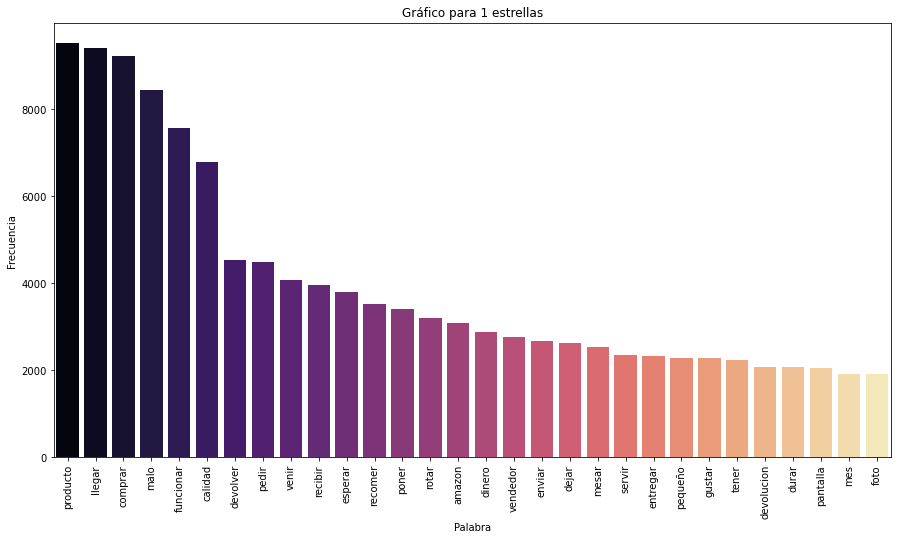

In [74]:
#Gráfico de frecuencia de palabras para 1 estrellas
plot_frequent_words ('1',df_word_freq_1)

**CONCLUSIÓN:**

  
  - las palabras mas frecuentes para los comentarios de 5 estrellas fueron: bueno, calidad, perfecto, comprar, preciar, entre otras
  
  - las palabras mas frecuentes para los comentarios de 4 estrellas fueron: bueno, calidad, preciar,  producto, comprar, entre otras.
  
  - las palabras mas frecuentes para los comentarios de 3 estrellas fueron: calidad, bueno, preciar, producto, entre otras.
  
  - las palabras mas frecuentes para los comentarios de 2 estrellas fueron: calidad, comprar, producto, funcionar, entre otras.
  - las palabras mas frecuentes para los comentarios de 1 estrellas fueron: producto, llegar, comprar, malo, funcionar, entre otras.
  
  Las palabras como perfecto, encantar, genial, fácil, perfectamente, están mas asociadas a comentarios con buena puntuación (3, 4 y 5 estrellas)
  
  Las palabras como devolver, devolución, dinero, dejar, están mas asociadas a comentarios con mala puntuación (1 y 2 estrellas).
  
  Existen varias palabras como bonito, gustar, entre otras, que se encuentran asociadas a las buenas y malas calificaciones, y esto se debe al contexto en el que se usan: me gustó (gustar) / no me gustó (gustar), muy bonito / nada bonito.
  
 Es importante descatacar que en los comentarios de 1 estrella, aparece la palabra Amazon en la posición 17, indicando tal vez que el cliente, quiere dejar expuesta a la marca por la mala experiencia. 

**2)** ¿Cuándo se escribe mas? ¿Con buenas calificaciones o con malas?

Esta pregunta es interesante desde el punto de vista del negocio, ya que se desearía tener comentarios mas largos a medida que la calificación sea menor, de manera que el cliente se pueda expresar mejor sobre esta mala calificación.

In [75]:
#Hago una copia del dataset
dataset_train = dataset_train.copy()
dataset_train

,stars,product_category,review_title_body,clean,token
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,"(television, nevir, bueno, ka, pantalla, mesar..."
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,"(dinero, tirar, basura, comprar, horrible, ten..."
2,1,farmacia,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,"(llegar, unidad, obligar, comprar, obligar, co..."
3,1,inalámbrico,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,"(producto, recibir, entrar, descalificar, vend..."
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,"(devolver, llegar, co, tallar, equivocar)"
...,...,...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,"(describir, mandar, funcionar, perfectamente, ..."
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,"(funcionar, perfectamente, comprar, bateria, r..."
199997,5,ropa,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,"(bueno, calidad, bueno, calidad, satisfacer, c..."
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,"(recomendar, perfecto, cumplir, hijo)"


In [76]:
# Sumo el número de tokens y los almaceno en una columna llamada num_tokens
dataset_train['num_tokens'] = [len (token) for token in dataset_train.token]
dataset_train

,stars,product_category,review_title_body,clean,token,num_tokens
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,"(television, nevir, bueno, ka, pantalla, mesar...",9
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,"(dinero, tirar, basura, comprar, horrible, ten...",12
2,1,farmacia,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,"(llegar, unidad, obligar, comprar, obligar, co...",13
3,1,inalámbrico,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,"(producto, recibir, entrar, descalificar, vend...",24
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,"(devolver, llegar, co, tallar, equivocar)",5
...,...,...,...,...,...,...
199995,5,electrónicos,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,"(describir, mandar, funcionar, perfectamente, ...",14
199996,5,electrónicos,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,"(funcionar, perfectamente, comprar, bateria, r...",14
199997,5,ropa,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,"(bueno, calidad, bueno, calidad, satisfacer, c...",6
199998,5,juguetes,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,"(recomendar, perfecto, cumplir, hijo)",4


**NOTA**: Aplico esto mismo a los dataset DEV y TEST para usar a futuro!

In [77]:
# Sumo el número de tokens y los almaceno en una columna llamada num_tokens
dataset_dev['num_tokens'] = [len (token) for token in dataset_dev.token]

In [78]:
# Sumo el número de tokens y los almaceno en una columna llamada num_tokens
dataset_test['num_tokens'] = [len (token) for token in dataset_test.token]

In [79]:
#Promedio y desvío stándar de tokens por estrella
num_tokens = dataset_train.groupby('stars')[['num_tokens']].mean()
std_token = dataset_train.groupby('stars')[['num_tokens']].std()
num_tokens['std'] = std_token
num_tokens

,num_tokens,std
stars,,
1,12.243475,8.780924
2,13.248450,9.599397
3,12.180100,9.232971
4,11.587450,8.828882
5,11.560500,9.294617


In [80]:
#Diferencio los datasets por sus estrellas
dataset_long_5 = dataset_train[dataset_train.stars == 5]
dataset_long_4 = dataset_train[dataset_train.stars == 4]
dataset_long_3 = dataset_train[dataset_train.stars == 3]
dataset_long_2 = dataset_train[dataset_train.stars == 2]
dataset_long_1 = dataset_train[dataset_train.stars == 1]

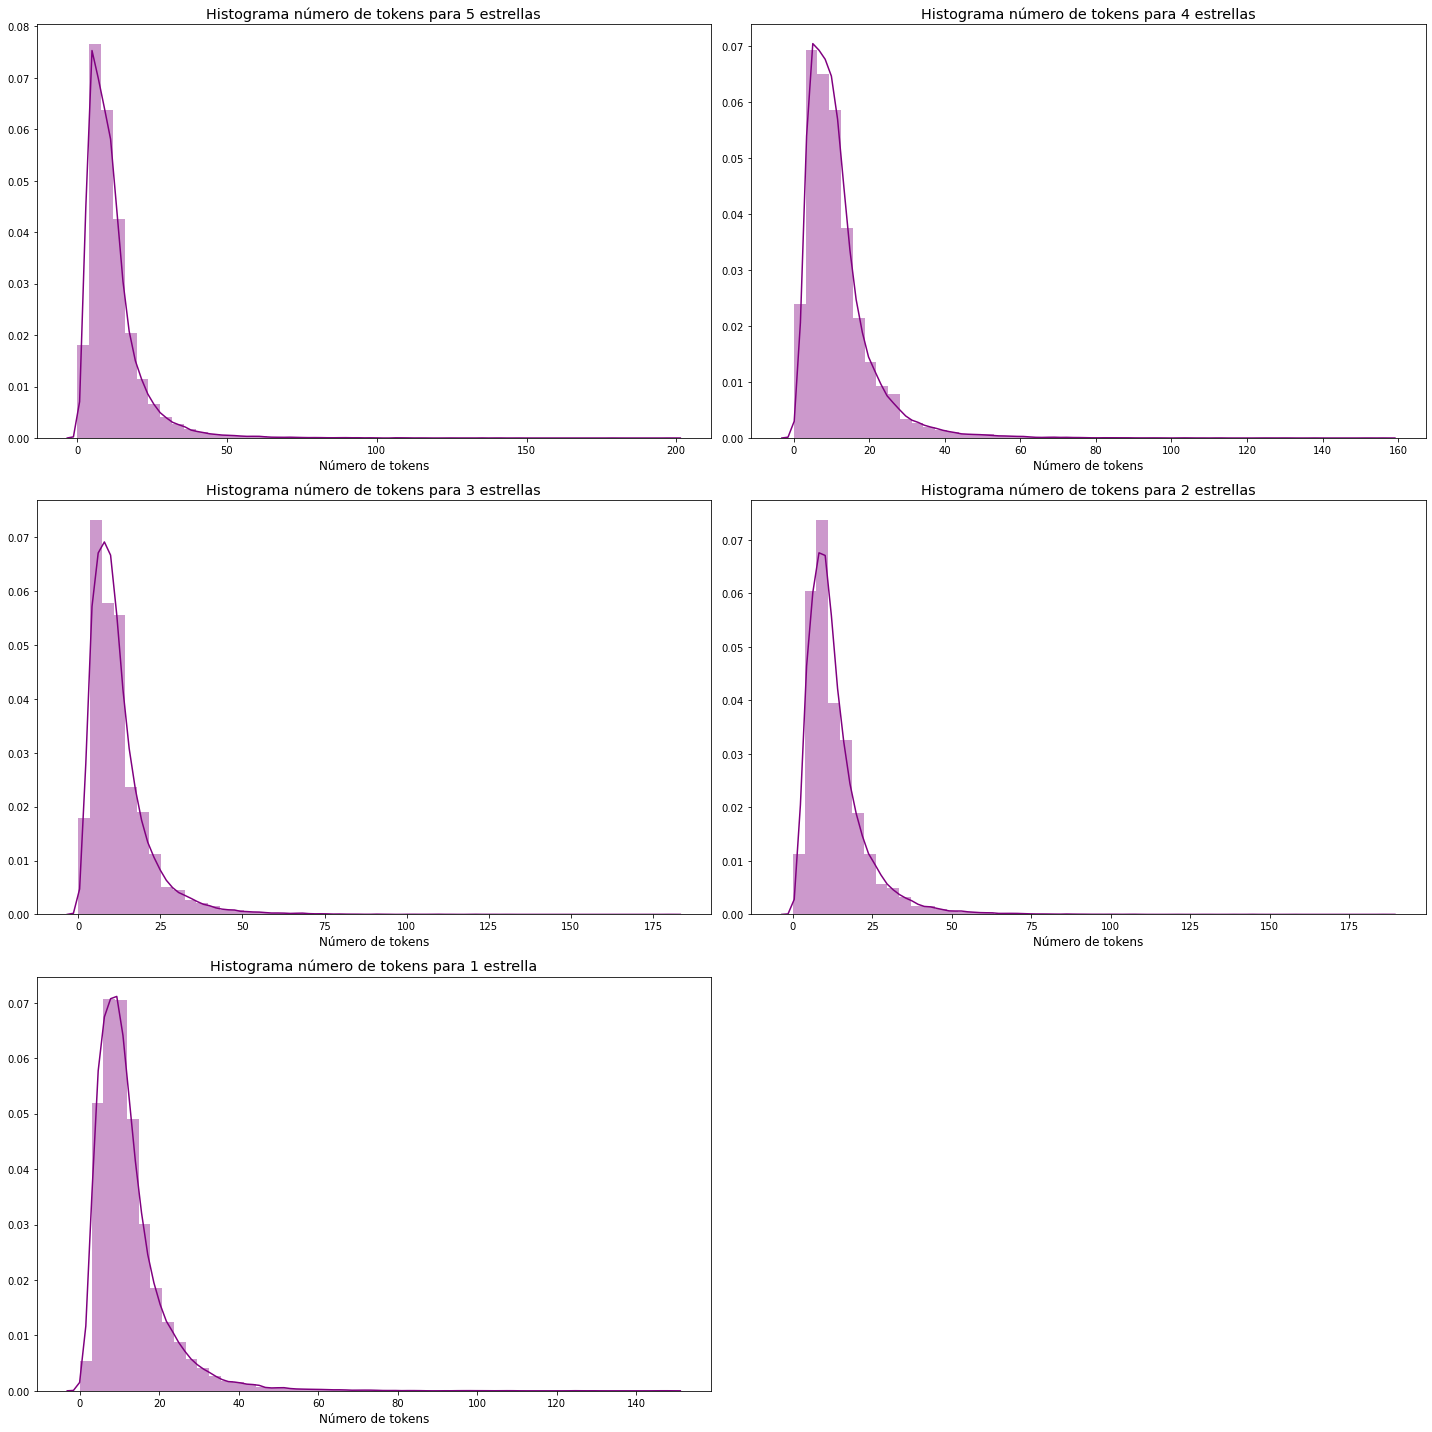

In [81]:
# Histograma para determinar el número de tokens por estrella

plt.figure(figsize = (20,20))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0])
sns.distplot(dataset_long_5.num_tokens, bins = 50, 
             color = 'purple').set_title("Histograma número de tokens para 5 estrellas", size = 'x-large')
plt.xlabel('Número de tokens', size = 'large')

ax2 = plt.subplot(gs[1])
sns.distplot(dataset_long_4.num_tokens, bins = 50, 
             color = 'purple').set_title("Histograma número de tokens para 4 estrellas", size = 'x-large')
plt.xlabel('Número de tokens', size = 'large')

ax3 = plt.subplot(gs[2])
sns.distplot(dataset_long_3.num_tokens, bins = 50, 
             color = 'purple').set_title("Histograma número de tokens para 3 estrellas", size = 'x-large')
plt.xlabel('Número de tokens', size = 'large')

ax4 = plt.subplot(gs[3])
sns.distplot(dataset_long_2.num_tokens, bins = 50, 
             color = 'purple').set_title("Histograma número de tokens para 2 estrellas", size = 'x-large')
plt.xlabel('Número de tokens', size = 'large')

ax5 = plt.subplot(gs[4])
sns.distplot(dataset_long_1.num_tokens, bins = 50, 
             color = 'purple').set_title("Histograma número de tokens para 1 estrella", size = 'x-large')
plt.xlabel('Número de tokens', size = 'large')

plt.tight_layout()

**CONCLUSIÓN:** En general, el número de tokens promedio fue muy similar en las 5 estrellas. Por muy poca diferencia, se podría decir que se escribe mas en los comentarios mas negativos (estrellas 1, 2 y 3). Un usuario molesto, escribe mas. Esto es deseable, en el sentido de que tal vez explique de mejor manera su motivo de disconformidad.

In [82]:
gc.collect()

43761

# Parte B: modelos de Machine Learning

**CONSIGNA:** Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. Para pensar: ¿es un problema de Clasificación o de Regresión?

El problema es de *Clasificación*. Las tareas de clasificación, tienen salidas binarias o salidas categóricas, es decir
que la clase a predecir adquiere un conjunto finito de valores nominales.

En otras palabras, si el tipo de etiqueta a predecir son categorías, la tarea es de clasificación. 

## 1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.

Las transformaciones de los datos, ya las realicé en el paso previo, con el objetivo de poder responder a algunas de las preguntas que me hice. Sin embargo, volveré a realizar la justificación aquí.

El objetivo es poder quedarme con palabras que puedan tener información importante y representativa de la clase en la que se encuentran (es decir el número de estrella). 

- 1.  Eliminé los emojis y emoticones

Eliminar los emojis para quedarme solo con palabras. NOTA: Tal vez, los emojis y emoticones, sea necesario conservarlo al pensar en un análisis de sentimientos.

- 2. Eliminé los números 

En el dataset, solo quería quedarme con palabras, por lo que la existencia de números consideraba que no iban a aportar información y por ello los quité.

- 3. Llevé a minúsculas todas las palabras

El llevar a minúsculas, permite que palabras iguales, que solo se diferencien en si están todas o parcialmente escritas en mayúsculas, no sean consideradas como palabras diferentes.

- 4. Eliminé puntuaciones

Las puntuaciones, no aportan información, y no es el objetivo, que lo mas frecuente sea un signo de puntuación. NOTA: Tal vez, un signo de puntuación, como por ejemplo `!`sea necesario conservarlo al pensar en un análisis de sentimientos.

- 5. Eliminé las `stop words`

Las `stop words` son un conjunto de palabras de uso común en un idioma. Ejemplo son "a", "la", "el", "es", "son", etc. Al eliminar las palabras con poca información del texto, solo nos quedamos con las palabras importantes.

- 6. Hice la lemmatización

La lematización es el proceso de convertir una palabra a su forma básica. Así por ejemplo, palabras como riendo, rien...se lemmatizan a la palabra reir, uniformando a una sola palabra y dándole peso a la misma, que de la otra forma serían consideredas y contabilizadas como palabras distintas.

- 7. Cambio vocales con acento por vocales sin acento

En el caso del idioma español, es importante quitar los acentos, ya que escribir **batería** o **bateria**, serían la misma palabra, pero a nivel de análisis, serían consideradas como dos palabras diferentes.

## 2. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.

La **métrica** elegida para evaluar los modelos fue la exactitud (**accuracy**). La elegí debido a que, por un lado, las clases son balanceadas. Además, no interesa alguna clase en particular, sino el rendimiento general del modelo.

## 3. Elige un modelo benchmark y compara tus resultados con este modelo.

El modelo benchmark es un **árbol de decisión con 1000 features y una profundidad de 1**.

**NOTA**: para el modelo benchmark utilicé los datasets TRAIN y TEST. Usé el datastet TEST, ya que mis modelos (desarrollados en el punto siguiente) los validaré con el dataset TEST, y de esta manera la comparación será equitativa. 

In [83]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y la calificación para TEST
lista_reviews_test = list(dataset_test['clean'].values)
stars_test = dataset_test['stars'].values

#Instanciamos 
tfidf = TfidfVectorizer(max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo en TEST
matriz_reviews_test = tfidf.transform(lista_reviews_test)

print(matriz_reviews_train.shape)
print(matriz_reviews_test.shape)

(200000, 1000)
(5000, 1000)


In [84]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train = matriz_reviews_train.astype('float32')

#Cambio el tipo de dato stars_train
stars_train = stars_train.astype('int8')

#Cambio el tipo de dato de la matriz 'matriz_reviews_test'
matriz_reviews_test = matriz_reviews_test.astype('float32')

#Cambio el tipo de dato stars_test
stars_test = stars_test.astype('int8')

- Modelado

In [85]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train.toarray()
y_train = stars_train
print(X_train.shape)
print(y_train.shape)

(200000, 1000)
(200000,)


In [86]:
#Con el dataset TEST determino el X_test y el y_test
X_test = matriz_reviews_test.toarray()
y_test = stars_test
print(X_test.shape)
print(y_test.shape)

(5000, 1000)
(5000,)


In [87]:
#Instancio el árbol de decisión y lo entreno
trees = DecisionTreeClassifier(max_depth=1) 
trees.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [88]:
#Hago las predicciones
y_pred_train = trees.predict(X_train)
y_pred_test = trees.predict(X_test)

In [89]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.241505
El accuracy en Test es: 0.2384


In [90]:
#Función para graficar la matriz de confusión
def confusion_5_stars(ytest,y_pred):
    names=['1 estrella','2 estrellas','3 estrellas','4 estrellas','5 estrellas']
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,fmt=".0f",ax=ax, cmap = 'magma', linecolor = 'black')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names, rotation = 45)
    ax.set_yticklabels(names, rotation = 45)
    plt.show()

    return

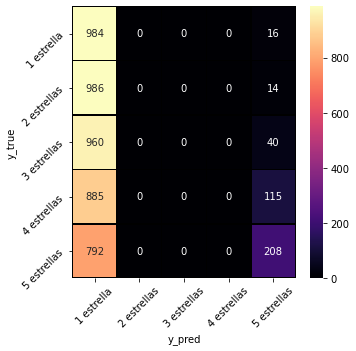

In [91]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [92]:
#winsound.Beep(freq, duration)

**CONCLUSIÓN**: El modelo benchmark resultó tener un accuracy bajo, tanto en Train (0.242) como en Test (0.238). El modelo funciona bien, solo para predecir la estrella 1. Además, en la matriz de confusión se puede ver que clasifica la mayoría de las estrellas de manera errónea como si fueran 1 estrella. No predice de manera acertada ninguna estrella 2, 3 y 4.

## 4. Optimiza los hiperparámetros de tu modelo.

- Para comenzar la parte de Machine Learning, lo que haré será realizar la vectorización, esto es necesario ya que los modelos sólo puede procesar datos numéricos.

- El método para vectorizar será el TF-IDF. 



Usaré todos sus parámetros por default, a excepción de:

- `ngram_range` = (1,2): significa unigramas y bigramas. Decidí utilizar ambos, ya que luego de probar solo con unigramas, obtenía mejores resultados usando ambos.
- `min_df`= 30: al construir el vocabulario, ignora los términos que tienen una frecuencia de documento estrictamente más baja que el umbral dado. Esto lo limité ya que, al incluir uni y bigramas el número de features era muy grande (>900000)

**NOTA**: Probaré dos modelos: al mejor de ellos, le optimizaré sus hiperparámetros y evaluaré con el dataset TEST. ¿Por qué probar dos modelos? Me parecía una buena manera de dar posibilidad a obtener un mejor resultado.

Los dos modelos que probaré serán: 

a) `Regresión Logística`

b) `Linear Support Vector Classification (Linear SVC)`: lo elegí ya que Scikit-Learn, en su documentación referente a SVC (Support Vector Classification) sugiere que para grandes datasets se use LinearSVC. Éste es similar a SVC con parámetro kernel = 'linear', pero implementado en términos de liblinear en lugar de libsvm, por lo que tiene más flexibilidad en la elección de penalizaciones y funciones de pérdida y debería escalar mejor a un gran número de muestras.

**NOTA 2**: para los modelos utilicé los datasets TRAIN y DEV. Usé el datastet TEST, para validar mi modelo elegido y con sus hiperparámetros optimizados. 

**a) Regresión Logística**

El modelo que utilizaré es una Regresión Logística, con sus parámetros por default, a excepción de:

- `solver`: lo fijé en `saga`ya que es el recomendado para datasets grande 
- `dual`= False: se prefiere dual = False cuando n_samples> n_features.
- `random_state`= 42: establecí una semilla, para la futura reproducción de los resultados.

En el caso de multiclase, el algoritmo de entrenamiento usa el esquema one-vs-rest (OvR) si la opción 'multi_class' está configurada como 'ovr', y usa la pérdida de entropía cruzada si la opción 'multi_class' está configurada como 'multinomial'. Por default aplica regularización por el método de Ridge (L2). 

- Definir las variables a utilizar para Train y Test.

In [93]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev = list(dataset_dev['clean'].values)
stars_dev = dataset_dev['stars'].values

In [94]:
#Instacio el TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30) 

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo para DEV
matriz_reviews_dev = tfidf.transform(lista_reviews_dev)

print(matriz_reviews_train.shape)
print(matriz_reviews_dev.shape)

(200000, 10221)
(5000, 10221)


   - Elección del número de features

Como se puede ver, el número de features es aún muy elevado (> 10000). 

Para poder acotar el número de features a utilizar, realizaré varias veces el mismo modelo, variando el parámetro max_features. Luego haré un gráfico, para representar el accuracy en función del número de features.

In [95]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [100, 500, 1000, 3000, 5000, 10000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer
    tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train = matriz_reviews_train.astype('float32')

    #Cambio el tipo de dato stars_train
    stars_train = stars_train.astype('int8')

    #Transformo en DEV
    matriz_reviews_dev = tfidf.transform(lista_reviews_dev)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev = matriz_reviews_dev.astype('float32')

    #Cambio el tipo de dato stars_dev
    stars_dev = stars_dev.astype('int8')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train.toarray()
    y_train = stars_train

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev.toarray()
    y_test = stars_dev   
    
    #Defino el modelo de Regresión Logística
    rl = LogisticRegression(solver = 'saga',
                            dual = False,
                            n_jobs = -1, 
                            random_state = 42)
    rl.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = rl.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = rl.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

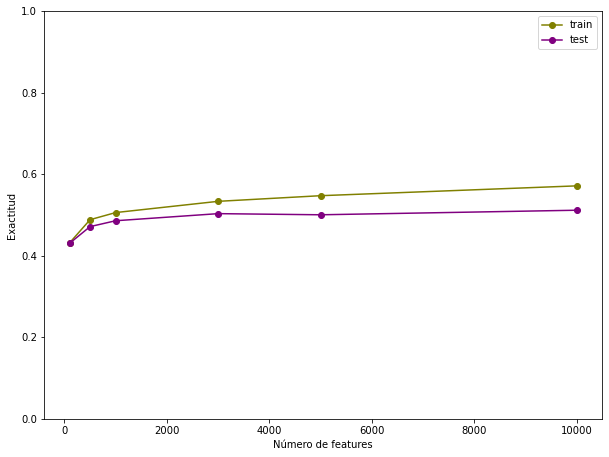

In [96]:
#Realizo el gráfico para los valores de accuracy obtenidos
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_accuracy_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_accuracy_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [97]:
#winsound.Beep(freq, duration)

Como se puede observar, a partir de los 1000 features, el comportamiento del modelo en Test es casi constante, mientras que comienza a separarse del Train. Por lo que realizaré el mismo procedimiento, pero acotando el parámetro del número de features.

In [98]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [50, 100, 150, 200, 300, 400, 600, 800, 1000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacion el TfidfVectorizer
    tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train = matriz_reviews_train.astype('float32')

    #Cambio el tipo de dato stars_train
    stars_train = stars_train.astype('int8')

    #Transformo para DEV
    matriz_reviews_dev = tfidf.transform(lista_reviews_dev)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev = matriz_reviews_dev.astype('float32')

    #Cambio el tipo de dato stars_dev
    stars_dev = stars_dev.astype('int8')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train.toarray()
    y_train = stars_train

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev.toarray()
    y_test = stars_dev   
      
    #Defino el modelo de Regresión Logística
    rl = LogisticRegression(solver = 'saga', 
                            n_jobs = -1, 
                            random_state = 42)
    rl.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = rl.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = rl.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

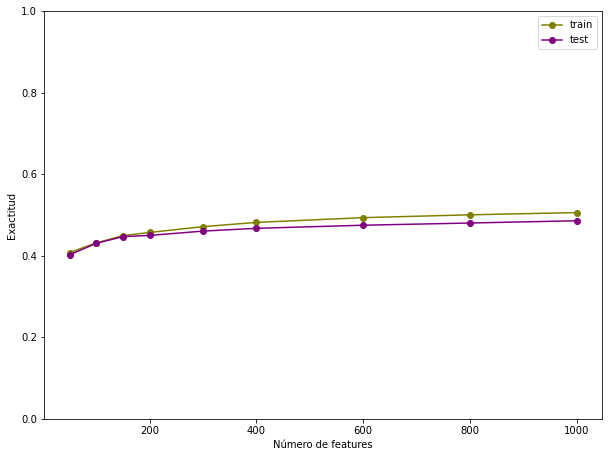

In [99]:
#Realizo el gráfico para los valores de accuracy obtenidos
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_accuracy_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_accuracy_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [100]:
#winsound.Beep(freq, duration)

En 1000 features se da el máximo de accuracy en Test. Además, la diferencia con Train no es grande. Por ello elegiré ese número de features a usar en el modelo de Regresión Logística.

**Número de `max_features` elegido: 1000**

In [101]:
gc.collect()

5715

- Regresión logística con 1000 features.

In [102]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev = list(dataset_dev['clean'].values)
stars_dev = dataset_dev['stars'].values

#Instanciamos el TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo en DEV
matriz_reviews_dev = tfidf.transform(lista_reviews_dev)

print(matriz_reviews_train.shape)
print(matriz_reviews_dev.shape)

(200000, 1000)
(5000, 1000)


In [103]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train = matriz_reviews_train.astype('float32')

#Cambio el tipo de dato stars_train
stars_train = stars_train.astype('int8')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev = matriz_reviews_dev.astype('float32')

#Cambio el tipo de dato stars_dev
stars_dev = stars_dev.astype('int8')

- Modelado

In [104]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train.toarray()
y_train = stars_train

In [105]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev.toarray()
y_test = stars_dev

In [106]:
# Instancio el modelo
rl = LogisticRegression(solver = 'saga', 
                        dual = False,
                        n_jobs = -1, 
                        random_state = 42)

#Entreno el modelo
rl.fit(X_train, y_train)

#Cross Validation
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
cv_results = cross_val_score(rl, X_train, y_train, 
                 cv=cv, scoring='accuracy')

print('El accuracy promedio y su desvío estándar es:',cv_results.mean(),'±', (cv_results.std()), '\n')
print('Los 15 accuracy son:', cv_results)

El accuracy promedio y su desvío estándar es: 0.49024999999999996 ± 0.0023652695406655047 

Los 15 accuracy son: [0.490325 0.4909   0.4925   0.494375 0.486075 0.487825 0.48895  0.493025
 0.48685  0.489125 0.493625 0.488875 0.49095  0.4912   0.48915 ]


In [107]:
#Calculo los valores predichos
y_pred_test = rl.predict(X_test)
y_pred_train = rl.predict(X_train)

In [108]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.505855
El accuracy en Test es: 0.4858


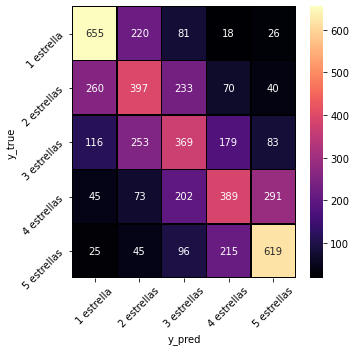

In [109]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [110]:
#winsound.Beep(freq, duration)

In [111]:
gc.collect()

5767

**CONCLUSIÓN:** el accuracy para el conjunto de Train fue de 0.506 y para el conjunto de Test fue de 0.486. Predice de mejor manera las estrellas 1 y 5, y tiene menos exactitud para predecir las estrellas 2, 3 y 4.

**b) Linear Support Vector Classification (Linear SVC)**

El modelo que aplicaré a continuación es el de LinearSVC. 

Es similar a SVC con parámetro kernel = ’linear’, pero implementado en términos de liblinear en lugar de libsvm, por lo que tiene más flexibilidad en la elección de penalizaciones y funciones de pérdida y debería escalar mejor a un gran número de muestras. Como se menciona, por default tiene regularización por Ridge (L2). 

El modelo lo apliqué con sus parámetros por default, a excepción de:

- `dual`= False: se prefiere dual=False cuando n_samples > n_features
- `random_state` = 42: fijé una semilla para la futura reproducción de los resultados.

- Definir las variables a utilizar para Train y Test.

In [112]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev = list(dataset_dev['clean'].values)
stars_dev = dataset_dev['stars'].values

In [113]:
#Instacio el TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30) 

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo para DEV
matriz_reviews_dev = tfidf.transform(lista_reviews_dev)

print(matriz_reviews_train.shape)
print(matriz_reviews_dev.shape)

(200000, 10221)
(5000, 10221)


- Elección del número de feartures

Como se puede ver, el número de features es muy elevado (>10000). Para determinar el número de features a utilizar, realizaré varias veces el mismo modelo, variando el parámetro max_features. Luego haré un gráfico, para representar el accuracy en función del número de features.

In [114]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [100, 500, 1000, 3000, 5000, 10000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer 
    tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo wen TRAIN
    matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train = matriz_reviews_train.astype('float32')

    #Cambio el tipo de dato stars_train
    stars_train = stars_train.astype('int8')

    #Transformo para DEV
    matriz_reviews_dev = tfidf.transform(lista_reviews_dev)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev = matriz_reviews_dev.astype('float32')

    #Cambio el tipo de dato stars_dev
    stars_dev = stars_dev.astype('int8')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train.toarray()
    y_train = stars_train

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev.toarray()
    y_test = stars_dev   
      
    #Defino el modelo de LinearSVC
    svc = LinearSVC(dual = False,
                    random_state= 42) 
    svc.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = svc.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = svc.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

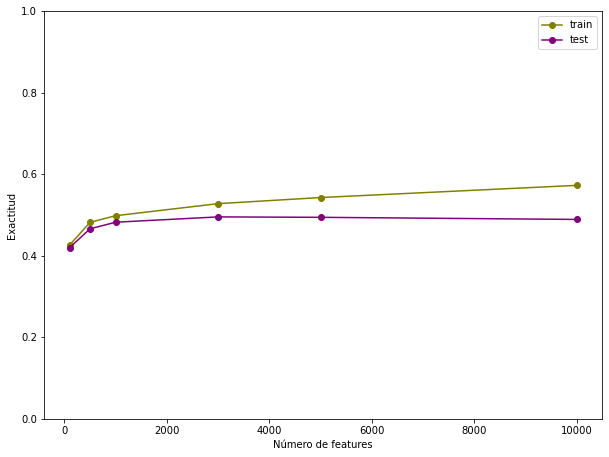

In [115]:
#Realizo el gráfico para los valores de accuracy
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_accuracy_train,'o-',label='train', color ='olive')
plt.plot(n_max_features,lista_accuracy_test,'o-',label='test', color ='purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [116]:
winsound.Beep(freq, duration)

Como se puede observar, a partir de los 1000 features, el comportamiento del modelo en Test es casi constante (y hasta comienza a decrecer), mientras que comienza a separarse del Train. Por lo que realizaré el mismo procedimiento, pero acotando el parámetro del número de features.

In [117]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [50, 100, 150, 200, 300, 400, 600, 800, 1000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacion el TfidfVectorizer
    tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train = matriz_reviews_train.astype('float32')

    #Cambio el tipo de dato stars_train
    stars_train = stars_train.astype('int8')

    #Transformo en DEV
    matriz_reviews_dev = tfidf.transform(lista_reviews_dev)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev = matriz_reviews_dev.astype('float32')

    #Cambio el tipo de dato stars_dev
    stars_dev = stars_dev.astype('int8')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train.toarray()
    y_train = stars_train

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev.toarray()
    y_test = stars_dev   
      
    #Defino el modelo de LinearSVC
    svc = LinearSVC(dual = False,
                    random_state= 42) 
    svc.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = svc.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = svc.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

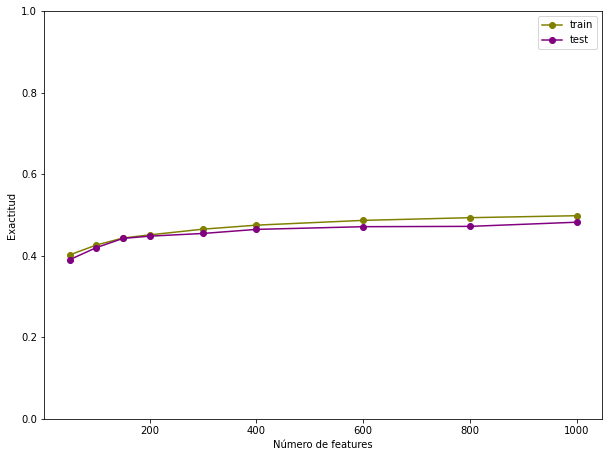

In [118]:
#Realizo el gráfico para los valores de accuracy
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_accuracy_train,'o-',label='train', color ='olive')
plt.plot(n_max_features,lista_accuracy_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [119]:
#winsound.Beep(freq, duration)

En 1000 features se da el máximo de accuracy en Test. Además, la diferencia con Train no es grande. Por ello elegiré ese número de features a usar en el modelo de LinearSVC.

**Número de `max_features` elegido: 1000**

In [120]:
gc.collect()

40

- Linear Support Vector Classification (Linear SVC) con 1000 features.

In [121]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev = list(dataset_dev['clean'].values)
stars_dev = dataset_dev['stars'].values

#Instanciamos 
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo en DEV
matriz_reviews_dev = tfidf.transform(lista_reviews_dev)

print(matriz_reviews_train.shape)
print(matriz_reviews_dev.shape)

(200000, 1000)
(5000, 1000)


In [122]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train = matriz_reviews_train.astype('float32')

#Cambio el tipo de dato stars_train
stars_train = stars_train.astype('int8')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev = matriz_reviews_dev.astype('float32')

#Cambio el tipo de dato stars_dev
stars_dev = stars_dev.astype('int8')

- Modelado

In [123]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train.toarray()
y_train = stars_train

In [124]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev.toarray()
y_test = stars_dev

In [125]:
#Defino el modelo de Linear Support Vector Classification (Linear SVC)
svc = LinearSVC(dual = False,
                random_state= 42)

svc.fit(X_train, y_train)

#Cross Validation
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
cv_results = cross_val_score(svc, X_train, y_train, 
                 cv=cv, scoring='accuracy')

print('El accuracy promedio y su desvío estándar es:',cv_results.mean(),'±', cv_results.std(), '\n')
print('Los 15 accuracy son:', cv_results)

El accuracy promedio y su desvío estándar es: 0.4850016666666666 ± 0.002544413270066178 

Los 15 accuracy son: [0.4853   0.485175 0.488275 0.48845  0.480125 0.48325  0.485125 0.487625
 0.481925 0.48265  0.489475 0.485225 0.48305  0.485575 0.4838  ]


In [126]:
#Calculo los valores predichos
y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

In [127]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.498155
El accuracy en Test es: 0.4822


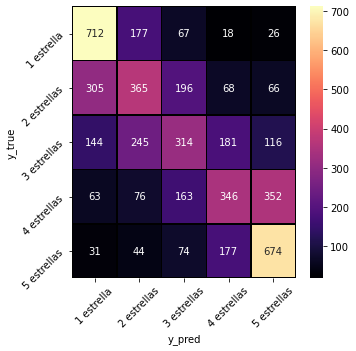

In [128]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [129]:
#winsound.Beep(freq, duration)

In [130]:
gc.collect()

5829

**CONCLUSIÓN:** el accuracy para el conjunto de Train fue de 0.498 y para el conjunto de Test fue de 0.482. Predice de mejor manera las estrellas 1 y 5, y de peor manera las estrellas 2, 3 y 4. 

**CONCLUSIÓN FINAL**: de ambos modelos que probé, sus valores de accuracy fueron muy similares. El modelo de Regresión Logística resultó ser mayor en centésimas en relación a LinearSVC. La diferencia entre el accuracy de Train y Test, es muy similar en ambos modelos. Por último, el tiempo de ejecución, es muchísimo menor usando LinearSVC (LinearSVC tiempo aproximado: 1 min; Regresión Logística tiempo aproximado: 49 min). Es por ello, que entre estos dos modelos, elijo para optimizar sus hiperparámetros: **LinearSVC**.

Lo próximo que haré será realizar la optimización de sus hiperparámetros, usando un RandomizedSearchCV.

**OPTIMIZACIÓN**

Tal como comenté anteriorimente, realizaré la optimización de hiperparámetros. Los mismos los seleccioné basándome en bibliografía y en la documentación de la librería. Ellos son:

`penalty`: {'l1', 'l2'}, predeterminado = 'l2'. Especifica la norma utilizada en la penalización.

`loss`: {'hinge', 'squared_hinge'}, predeterminado = 'squared_hinge'. Especifica la función de pérdida.

`tol`: {float}, predeterminado = 1e-4. Tolerancia a los criterios de parada.

`C`: {float}, predeterminado = 1.0. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva.

En cuanto al hiperparámetro `multi_class`decidí dejarlo por default, por sugerencia de la documentación de la librería:

`multi_class`: {'ovr', 'crammer_singer'}, predeterminado = 'ovr'. Determina la estrategia de clases múltiples si y contiene más de dos clases. 'ovr' entrena clasificadores de n_classes one-vs-rest, mientras que 'crammer_singer' optimiza un objetivo conjunto en todas las clases. Si bien crammer_singer es interesante desde una perspectiva teórica, ya que es consistente, rara vez se usa en la práctica, ya que rara vez conduce a una mejor precisión y es más costoso de calcular. Si se elige 'crammer_singer', se ignorarán las opciones pérdida, penalización y dual.

In [131]:
# Tomamos la lista de palabras y el vector que nos dice la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y el vector que nos dice la calificación para DEV
lista_reviews_dev = list(dataset_dev['clean'].values)
stars_dev = dataset_dev['stars'].values

#Instanciamos el Tfidfvectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo para TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo para DEV
matriz_reviews_dev = tfidf.transform(lista_reviews_dev)

print(matriz_reviews_train.shape)
print(matriz_reviews_dev.shape)

(200000, 1000)
(5000, 1000)


In [132]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train = matriz_reviews_train.astype('float32')

#Cambio el tipo de dato stars_train
stars_train = stars_train.astype('int8')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev = matriz_reviews_dev.astype('float32')

#Cambio el tipo de dato stars_dev
stars_dev = stars_dev.astype('int8')

- Modelado

In [133]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train.toarray()
y_train = stars_train

In [134]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev.toarray()
y_test = stars_dev

In [135]:
# Instancio el modelo
svc_o = LinearSVC(dual = False,
                  random_state= 42)

#Parámetros para el RandomizedSearchCV
parameters_for_testing = {  
                            'penalty': ['l1', 'l2'],
                            'loss' : ['hinge', 'squared_hinge'],
                            'tol': [1e-3, 1e-4, 1e-5],
                            'C': [1, 3, 5]

                         }

#Instancio el modelo                    
svc_rs = RandomizedSearchCV( estimator = svc_o, 
                             param_distributions = parameters_for_testing, 
                             n_iter = 30, 
                             cv = 5, 
                             scoring = 'accuracy',
                             n_jobs = -1)

#Entreno el modelo
svc_rs.fit(X_train, y_train)

#Imprimo los mejores parámetros y el mejor score
print('Los mejores parámetros son:', svc_rs.best_params_, '\n')
print('El mejor score es:', svc_rs.best_score_)

Los mejores parámetros son: {'tol': 0.0001, 'penalty': 'l1', 'loss': 'squared_hinge', 'C': 1} 

El mejor score es: 0.48535500000000004


In [136]:
#winsound.Beep(freq, duration)

In [137]:
#Entreno el modelo con los mejores parámetros
svc_o = LinearSVC(
                  dual = False, 
                  random_state = 42,
                  penalty = svc_rs.best_params_['penalty'],
                  C = svc_rs.best_params_['C'],
                  loss = svc_rs.best_params_['loss'],
                  tol = svc_rs.best_params_['tol']
                   )

svc_o.fit(X_train, y_train)

LinearSVC(C=1, dual=False, penalty='l1', random_state=42)

In [138]:
#Calculo los valores predichos
y_pred_test = svc_o.predict(X_test)
y_pred_train = svc_o.predict(X_train)

In [139]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.498245
El accuracy en Test es: 0.4812


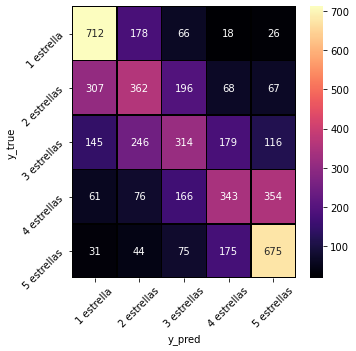

In [140]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [141]:
#winsound.Beep(freq, duration)

**CONCLUSIÓN:** el accuracy para el modelo con sus parámetros optimizados fue para el conjunto de Train de 0.498 y para el conjunto de Test fue de 0.481. Predice de mejor manera las estrellas 1 y 5, y de peor manera las estrellas 2, 3 y 4. 

La optimización de hiperparámetros no resultó en un aumento de accuracy. Cabe destaca que, LinearSVC por default ya tiene un parámetro de regularización. Por otro lado, también, previamente, he seleccionado el número mas óptimo de features para el modelo. También, en general, las librerías sufren la modificación de sus valores por default haciéndolos mas óptimos. Por estas cosas, es interpretable que el modelo otimizado no presentó una mejora de la métrica, respecto a sus valores por default.

Aunque los resultados fueron iguales, decidí utilizar los valores salidos de la optimización para probar la validación del modelo con el dataset TEST.

In [142]:
gc.collect()

5834

**Modelo a probar con el dataset TEST**

A continuación probaré el mejor modelo optimizado contra el dataset TEST, el cual no utilicé aún. Esta es una manera de validar el modelo.

In [154]:
# Tomamos la lista de palabras y el vector que nos dice la calificación para TRAIN
lista_reviews_train = list(dataset_train['clean'].values)
stars_train = dataset_train['stars'].values

# Tomamos la lista de palabras y el vector que nos dice la calificación para TEST
lista_reviews_test = list(dataset_test['clean'].values)
stars_test = dataset_test['stars'].values

#Instanciamos en Tfidfvectorizer
tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train = tfidf.fit_transform(lista_reviews_train)

#Transformo en TEST
matriz_reviews_test = tfidf.transform(lista_reviews_test)

all_words = tfidf.get_feature_names()

print(matriz_reviews_train.shape)
print(matriz_reviews_test.shape)

(200000, 1000)
(5000, 1000)


In [155]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train = matriz_reviews_train.astype('float32')

#Cambio el tipo de dato stars_train
stars_train = stars_train.astype('int8')

#Cambio el tipo de dato de la matriz 'matriz_reviews_test'
matriz_reviews_test = matriz_reviews_test.astype('float32')

#Cambio el tipo de dato stars_test
stars_test = stars_test.astype('int8')

- Modelado

In [156]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train.toarray()
y_train = stars_train

In [157]:
#Con el dataset TEST determino el X_test y el y_test
X_test = matriz_reviews_test.toarray()
y_test = stars_test

In [158]:
#Entreno el modelo con los mejores parámetros previamente obtenidos
svc_test = LinearSVC(
                    dual = False, 
                    random_state = 42,
                    penalty = 'l1',
                    C = 1,
                    loss = 'squared_hinge',
                    tol = 0.0001
                    )

svc_test.fit(X_train, y_train)

LinearSVC(C=1, dual=False, penalty='l1', random_state=42)

In [159]:
#Calculo los valores predichos
y_pred_test = svc_test.predict(X_test)
y_pred_train = svc_test.predict(X_train)

In [160]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.498245
El accuracy en Test es: 0.4914


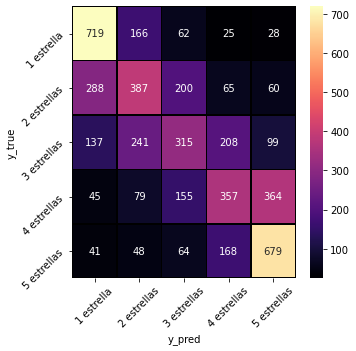

In [161]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [162]:
#winsound.Beep(freq, duration)

**CONCLUSIÓN FINAL**: La validación del modelo en el dataset TEST cuyos parámetros fueron optimizados, resultó en un aumento en milésimas (0.009) del accuracy en Test (0.491) y resultó invariable para el conjunto Train (0.498). Esto quiere decir, que el modelo, al ser probado con datos que nunca ha visto (ni para entrenar ni para optimizar sus hiperpámetros) resulta en un buen modelo (su accuracy no desciende).

In [163]:
gc.collect()

30377

**COMPARACIÓN CON EL MODELO BENCHMARK**

El modelo elegido y optimizado resultó en un aumento del 107% de exactitud respecto al modelo benchmark. Además, se puede ver como la predicción de las estrellas 2, 3, 4 y 5 mejora de manera muy importante.

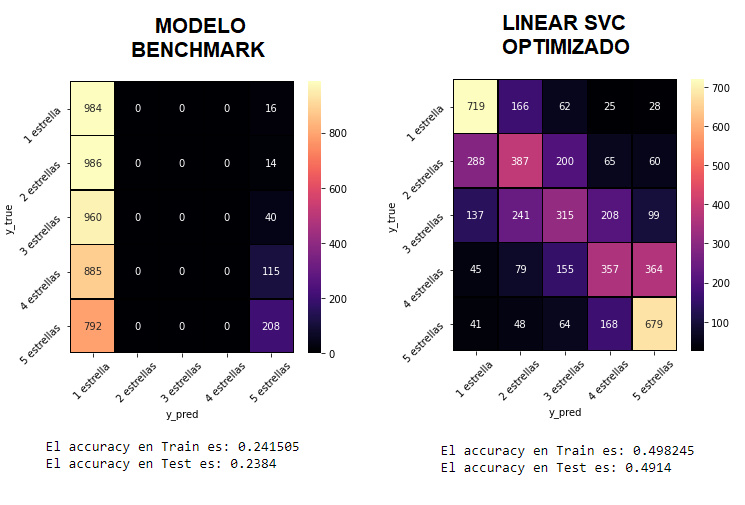

## 5. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

A continuación graficaré los 20 features mas importante que está usando el modelo para predecir (los primeros 10 positivos y los primeros 10 negativos).

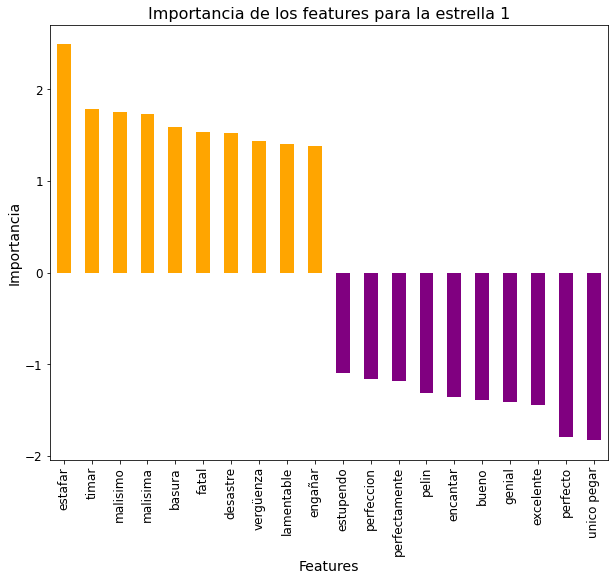

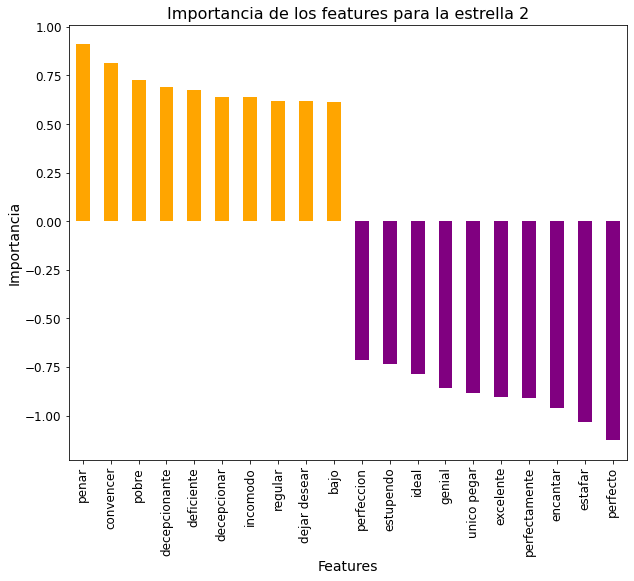

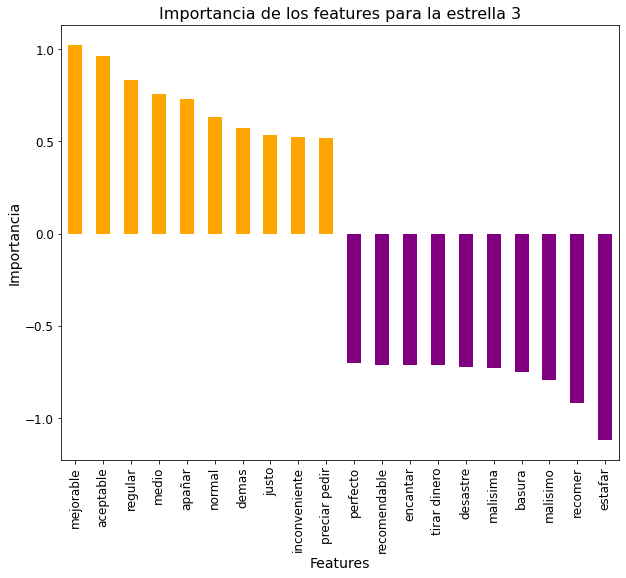

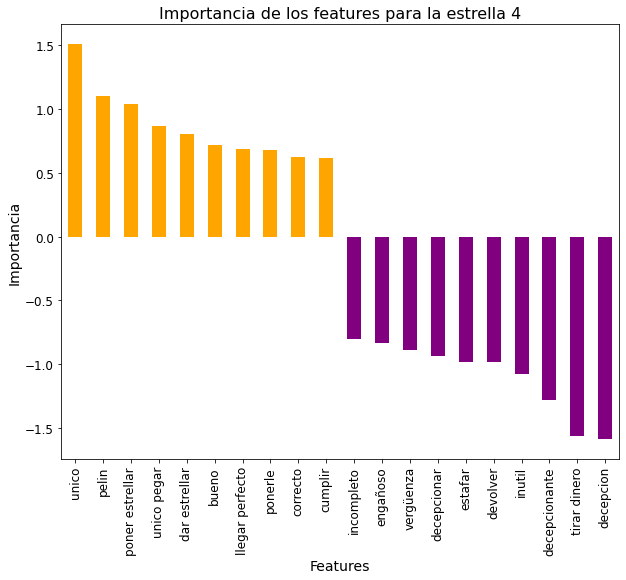

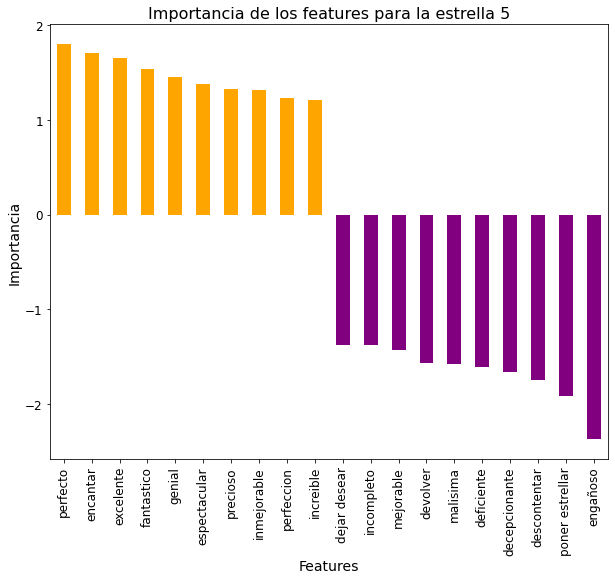

In [164]:
for index_star in range (0,5):
    
    coeff = list(svc_test.coef_[index_star])
    labels = list(all_words)

    features = pd.DataFrame()
    features['Features'] = labels
    features['Importance'] = coeff
    features = features.reset_index(drop=True)
    features_sort = features.sort_values(by=['Importance'], ascending=False)
    features_sort = features_sort.reset_index(drop=True)

    data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
    data_plot.sort_values(by=['Importance'], ascending=False, inplace = True)
    data_plot['positive'] = data_plot['Importance'] > 0
    data_plot.set_index('Features', inplace = True)
    data_plot.Importance.plot(kind='bar', figsize = (10,8), 
                              color = data_plot.positive.map({True: 'orange', False: 'purple'}),
                              fontsize=12)
    
    plt.xlabel ('Features', fontsize=14)
    plt.ylabel ('Importancia', rotation = 90, fontsize=14)
    plt.title ('Importancia de los features para la estrella ' + str(index_star+1), fontsize=16)
    plt.show()

**CONCLUSIÓN**: 

Para la **estrella 1**,  los features con importancia positiva fueron: estafar, timar, malísimo, malísima, basura, fatal, desastre. Los features con mayor importancia negativa fueron: unico pegar, perfecto, excelente, genial, bueno encantar.

Para la **estrella 2**,  los features con importancia positiva fueron: penar, convencer, pobre, decepcionante, decepcionar, incomodo. Los features con mayor importancia negativa fueron: perfecto, estafar, encantar,perfectamente, excelente, unico pegar.

Para la **estrella 3**,  los features con importancia positiva fueron: mejorable, aceptable, regular, medio, apañar, normal.
Los features con mayor importancia negativa fueron: destafar, recomer, malísimo, basura, malisima, desastre.

Para la **estrella 4**,  los features con importancia positiva fueron: unico, pelin, poner estrellar, unico pegar, dar estrellar, bueno, llera perfecto. 
Los features con mayor importancia negativa fueron: decepción, tirar dinero, decepcionante, inútil, devolver, estafar, decepcionar.

Para la **estrella 5**,  los features con importancia positiva fueron: perfecto, encantar, excelente, fantastico, genial, espectacular. 
Los features con mayor importancia negativa fueron: engañoso, poner estrella, descontentar, decepcionante, deficiente, malisima, devolver.

Cabe destacar que la importancia de las palabras, fue mayor en el caso de la estrella 1 y la estrella 5. 

Esta información coincide con lo que esperaba. Muchas de estas palabras ya habían aparecido como mas frecuentes de acuerdo a la estrella. Además, la importancia de los features para la estrella 1 y 5 fue mayor que para el resto, tal como se podía observar en las matrices de confusión, clasificando siempre de mejor manera las estrellas 1 y 5. Por otro lado, las palabras (o bloques de palabras) que aportan a la estrella 1 y a la estrella 5, son palabras que definen bien el descontento o felicidad respecto a un producto. Pero, en el caso de las estrellas intermedias estas palabras no son tan representativas. Desde mi punto de vista, esto se debe a que es difícil encontrar una palabra que pueda definir una calificación de 3 estrellas (o de 2...o de 4). 
Pensando es esto, tal vez, sea mas efectivo para predecir con mayor exactitud, una aproximación binaria: comentario positivo o negativo.

# Para pensar, investigar y, opcionalmente, implementar

## 1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?

De manera previa, creo que vale la pena convertir el problema de Machine Learning en un problema binario, y en lugar de predecir las estrellas, predecir las etiquetas Positivas y Negativas.

La predicción de las estrellas, resultó en una predicción no muy alta. Como se vió, la predicción es mejor para las estrellas extremo: es decir las estrellas 1 y estrellas 5, pero fracasa al predecir las estrellas intermedias (2, 3 y 4 estrellas). Por lo que al solo predecir dos clases, uniendo las estrellas de menor puntuación en una etiqueta `Negativa`y las de mayor puntuación en una etiqueta `Positiva`, la predicción debería tener un mejor comportamiento. 

Esta predicción binaria, podría ser útil, cuando, por ejemplo sólo se desea saber si un comentario será positivo o negativo.

**Decidí hacer una prueba transformando el dataset en binario**

Para realizar esta aproximación binaria, se le asignarán etiquetas `positivas`y `negativas` de acuerdo al número de estrellas, por lo que la predicción será de la etiqueta y no de las estrellas.

La asignación de las etiquetas como positivas y negativas, se han definido como:

- Etiquetas `negativa`: estrellas ≤ 3 
- Etiquetas `positiva`: 3 < estrellas ≤ 5

In [165]:
#Defino dataset en TRAIN
dataset_train_bin = dataset_train.copy()
dataset_train_bin = dataset_train_bin.reset_index(drop=True)

d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'}  
dataset_train_bin['label'] = dataset_train_bin.stars.apply(lambda x:d[x])
dataset_train_bin.head()

,stars,product_category,review_title_body,clean,token,num_tokens,label
0,1,electrónicos,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,"(television, nevir, bueno, ka, pantalla, mesar...",9,negativa
1,1,electrónicos,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,"(dinero, tirar, basura, comprar, horrible, ten...",12,negativa
2,1,farmacia,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,"(llegar, unidad, obligar, comprar, obligar, co...",13,negativa
3,1,inalámbrico,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,"(producto, recibir, entrar, descalificar, vend...",24,negativa
4,1,zapatos,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,"(devolver, llegar, co, tallar, equivocar)",5,negativa


In [166]:
#Defino dataset en DEV
dataset_dev_bin = dataset_dev.copy()
dataset_dev_bin = dataset_dev_bin.reset_index(drop=True)

#Asigno etiquetas
d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'}   
dataset_dev_bin['label'] = dataset_dev_bin.stars.apply(lambda x:d[x])
dataset_dev_bin.head()

,stars,product_category,review_title_body,clean,token,num_tokens,label
0,1,inalámbrico,Mala compra Malisimo muy grande demasiado apar...,malo comprar malisimo grande aparatoso protect...,"(malo, comprar, malisimo, grande, aparatoso, p...",7,negativa
1,1,ropa,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolucion,"(recibir, recibir, pedir, devolucion)",4,negativa
2,1,deportes,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...,"(apretar, manillar, buscar, sistema, funcionar...",12,negativa
3,1,mejoras del hogar,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diametr...,"(broca, mantequilla, utilizar, broca, menor, d...",20,negativa
4,1,belleza,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor viejo aspecto malo,"(gustar, gustar, olor, viejo, aspecto, malo)",6,negativa


In [167]:
#Defino dataset en TEST
dataset_test_bin = dataset_test.copy()
dataset_test_bin = dataset_test_bin.reset_index(drop=True)

#Asigno etiquetas
d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'}   
dataset_test_bin['label'] = dataset_test_bin.stars.apply(lambda x:d[x])
dataset_test_bin.head()

,stars,product_category,review_title_body,clean,token,num_tokens,label
0,1,inalámbrico,no me llego no me llego el articulo me lo mand...,llegar llegar articular mandar correo normal s...,"(llegar, llegar, articular, mandar, correo, no...",10,negativa
1,1,hogar,amazon sigue sin cumplir en las entregas la me...,amazon cumplir entregar mensajeria horrible co...,"(amazon, cumplir, entregar, mensajeria, horrib...",6,negativa
2,1,juguetes,ESTAFA EN EL ENVÍO Estoy muy decepcionado con ...,estafar enviar decepcionar vendedor pedir cump...,"(estafar, enviar, decepcionar, vendedor, pedir...",17,negativa
3,1,hogar,Estafa de Amazon Mi valoración no es sobre el ...,estafar amazon valoracion producto amazon ofre...,"(estafar, amazon, valoracion, producto, amazon...",29,negativa
4,1,libros electronicos,No conseguí pasar de la portada en Kindle Pues...,conseguir pasar portar kindle interes librar p...,"(conseguir, pasar, portar, kindle, interes, li...",21,negativa


In [168]:
#Cuento el número de casos de acuerdo a las etiquetas otorgadas
def count_labels (data_, data):
    plt.figure(figsize = (6,6))
    plot = sns.countplot(data['label'], palette = 'magma')
    plot.set_title(f'Gráfico para el dataset {data_}', fontsize = 'x-large')
    plt.xlabel('Etiqueta', fontsize = 'large' )
    plt.ylabel ('Cantidad', fontsize = 'large')
    plt.show()

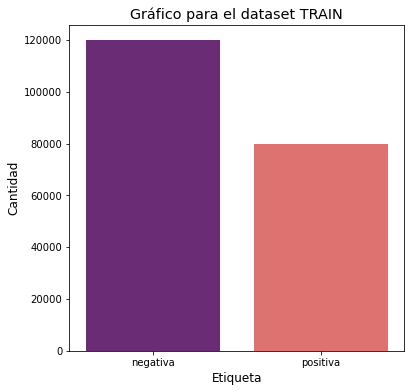

In [169]:
#Cuento el número de casos de acuerdo a las etiquetas en el datatset TRAIN
count_labels ('TRAIN', dataset_train_bin)

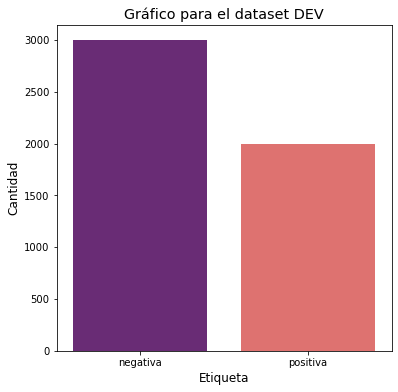

In [170]:
#Cuento el número de casos de acuerdo a las etiquetas en el datatset DEV
count_labels ('DEV', dataset_dev_bin)

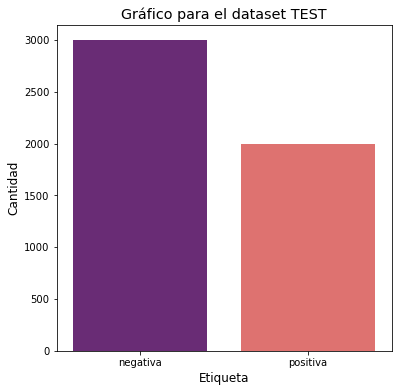

In [171]:
#Cuento el número de casos de acuerdo a las etiquetas en el datatset TEST
count_labels ('TEST', dataset_test_bin)

Como se ven en los gráficos, las categorías no son balanceadas, sin embargo, dicho desbalance es muy poco (60% clase negativa - 40% clase positiva en los tres datasets).

Un problema de clasificación puede estar un poco sesgado, como si hubiera un ligero desequilibrio. Alternativamente, el problema de clasificación puede tener un desequilibrio severo donde puede haber cientos o miles de ejemplos en una clase y decenas de ejemplos en otra clase para un conjunto de datos de entrenamiento dado.



La **métrica** elegida para evaluar los modelos fue la exactitud (**accuracy**). La elegí debido a que las clases están ligeremante desbalanceadas y el uso de la métrica accuracy es tolerable. Además, no interesa alguna clase en particular, sino el rendimiento general del modelo.

- El método para vectorizar será el TF-IDF. 



Usaré todos sus parámetros por default, a excepción de:

- `ngram_range` = (1,2): significa unigramas y bigramas.  Decidí utilizar ambos, ya que luego de probar solo con unigramas, obtenía mejores resultados usando ambos.
- `min_df`= 30: al construir el vocabulario, ignora los términos que tienen una frecuencia de documento estrictamente más baja que el umbral dado. Esto lo limité ya que, al incluir uni y bigramas el número de features era muy grande (>900000)

Al igual que para la predicción de las 5 estrellas, en el caso de la predicción binaria, probaré dos modelos: 

a) `Regresión Logística`

b) `Linear Support Vector Classification (Linear SVC)`

**NOTA**: para los modelos utilicé los datasets TRAIN y DEV. Usé el datastet TEST, para validar mi modelo elegido y con sus hiperparámetros optimizados. 

**a) Regresión Logística**

El modelo que utilizaré es una Regresión Logística, con sus parámetros por default, a excepción de:

- `solver`: lo fijé en `saga`ya que es el recomendado para datasets grande 
- `dual`= False: se prefiere dual = False cuando n_samples> n_features.
- `random_state`= 42: establecí una semilla, para la futura reproducción de los resultados.

Por default aplica regularización por el método de Ridge (L2). 

- Definir las variables a utilizar para Train y Test.

In [172]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin['label']

In [173]:
#Instacio el TfidfVectorizer
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30) 

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 10221)
(5000, 10221)


   - Elección del número de feartures

Como se puede ver, el número de features es aún muy elevado (>10000). Para poder acotar el número de features a utilizar, realizaré varias veces el mismo modelo, variando el parámetro max_features. Luego haré un gráfico, para representar el accuracy en función del número de features.

In [174]:
# Definimos las listas vacias para los valores accuracy deseados
lista_acc_train = []
lista_acc_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [100, 500, 1000, 3000, 5000, 10000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer
    tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

    #Transformo en DEV
    matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train_bin.toarray()
    y_train = label_train_bin

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev_bin.toarray()
    y_test = label_dev_bin   
    
    #Defino el modelo de Regresión Logística
    rl_bin = LogisticRegression(solver = 'saga',
                                dual = False,
                                n_jobs = -1, 
                                random_state = 42)
    rl_bin.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = rl_bin.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)   
    
    #Calculo los valores predichos en TEST 
    y_pred_test = rl_bin.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_acc_train.append(train_acc)
    lista_acc_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

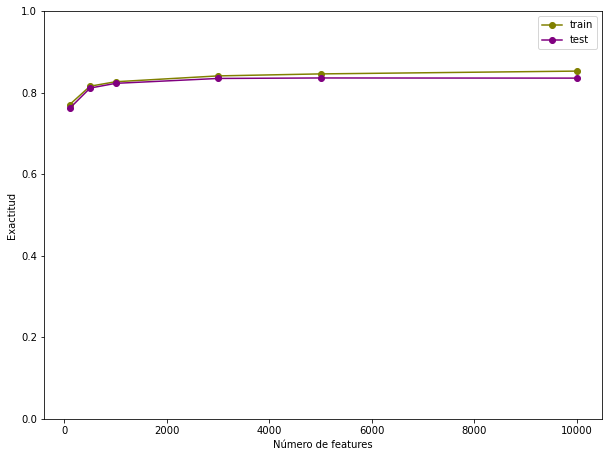

In [175]:
#Realizo el gráfico para los valores de accuracy obtenidos 
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_acc_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_acc_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [176]:
#winsound.Beep(freq, duration)

Como se puede observar, a partir de los 1000 features, el comportamiento del modelo en Test es casi constante (y hasta comienza a decrecer), mientras que comienza a separarse del Train. Por lo que realizaré el mismo procedimiento, pero acotando el parámetro del número de features.

In [177]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_acc_train = []
lista_acc_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [50, 100, 150, 200, 300, 400, 600, 800, 1000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer
    tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

    #Transformo en DEV
    matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train_bin.toarray()
    y_train = label_train_bin

    #Con el dataset TEST determino el X_test y el y_test
    X_test = matriz_reviews_dev_bin.toarray()
    y_test = label_dev_bin   
    
    #Defino el modelo de Regresión Logística
    rl_bin = LogisticRegression(solver = 'saga', 
                                n_jobs = -1, 
                                dual = False,
                                random_state = 42)
    rl_bin.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = rl_bin.predict(X_train)
    train_acc = accuracy_score (y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = rl_bin.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_acc_train.append(train_acc)
    lista_acc_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

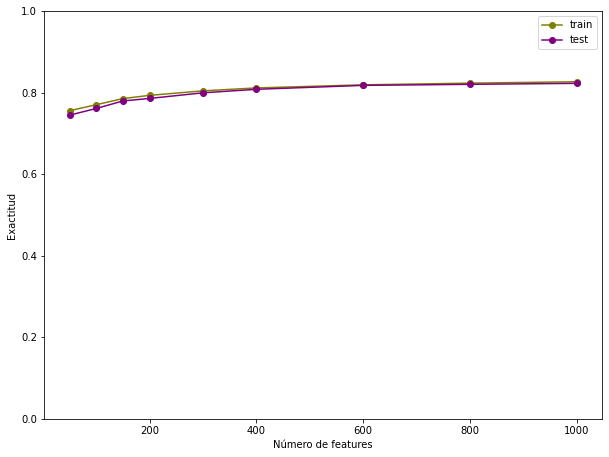

In [178]:
#Realizo el gráfico para los valores de accuracy obtenidos
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_acc_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_acc_test,'o-',label='test', color =  'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [179]:
#winsound.Beep(freq, duration)

En 1000 features se da el máximo de accuracy en Test. Además, la diferencia con Train es casi nula. Por ello elegiré ese número de features a usar en el modelo de Regresión Logística.

**Número de `max_features` elegido: 1000**

In [180]:
gc.collect()

31538

- Regresión Logística con 1000 features.

In [181]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin['label']

#Instanciamos el Tfidf Vectorizer 
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 1000)
(5000, 1000)


In [182]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')

- Modelado

In [183]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

In [184]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev_bin.toarray()
y_test = label_dev_bin

In [185]:
#Función para plotear la matriz de confusión
def confusion_bin(ytest,y_pred):
    names=['Negativa','Positiva']
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,fmt=".0f",ax=ax, cmap = 'magma')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names, rotation = 45)
    ax.set_yticklabels(names, rotation = 45)
    plt.show()

    return

In [186]:
# Instancio el modelo
rl_bin = LogisticRegression(
                            solver = 'saga', 
                            n_jobs = -1, 
                            dual = False,
                            random_state = 42
                           )

#Entreno el modelo
rl_bin.fit(X_train, y_train)

#Cross Validation
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
cv_results = cross_val_score(rl_bin, X_train, y_train, 
                 cv=cv, scoring = 'accuracy')

print('El accuracy score promedio y su desvío estándar es:',cv_results.mean(),'±', cv_results.std(), '\n')
print('Los 15 valores de accuracy son:', cv_results)

El accuracy score promedio y su desvío estándar es: 0.8238633333333333 ± 0.0020539163133443897 

Los 15 valores de accuracy son: [0.823475 0.822325 0.82445  0.8275   0.8215   0.821975 0.823825 0.82625
 0.82665  0.819675 0.824675 0.821975 0.825375 0.823725 0.824575]


In [187]:
#Calculo los valores predichos
y_pred_test = rl_bin.predict(X_test)
y_pred_train = rl_bin.predict(X_train)

In [188]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.82673
El accuracy en Test es: 0.8228


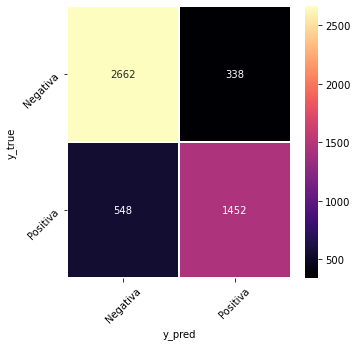

In [189]:
#Matriz de confusión para TEST
confusion_bin(y_test,y_pred_test)

In [190]:
#winsound.Beep(freq, duration)

In [191]:
gc.collect()

4157

**CONCLUSIÓN:** el accuracy para el conjunto de Train fue de 0.827 y para el conjunto de Test fue de 0.823. Predice de manera correcta un 88% de la etiqueta negativa y un 73% de la etiqueta positiva.

**b) Linear Support Vector Classification (Linear SVC)**

El modelo que aplicaré a continuación es el de LinearSVC. 

Es similar a SVC con parámetro kernel = ’linear’, pero implementado en términos de liblinear en lugar de libsvm, por lo que tiene más flexibilidad en la elección de penalizaciones y funciones de pérdida y debería escalar mejor a un gran número de muestras. Como se menciona, por default tiene regularización por Ridge (L2). 

El modelo lo apliqué con sus parámetros por default, a excepción de:

- `dual`= False: se prefiere dual=False cuando n_samples > n_features
- `random_state` = 42: fijé una semilla para la futura reproducción de los resultados.

- Definir las variables a utilizar para TRAIN y TEST.

In [192]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin['label']

In [193]:
#Instacio el TfidfVectorizer
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30) 

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 10221)
(5000, 10221)


   - Elección del número de feartures

Como se puede ver, el número de features es muy elevado. 

Para determinar el número de features a utilizar, realizaré varias veces el mismo modelo, variando el parámetro max_features. Luego haré un gráfico, para representar el accuracy en función del número de features.

In [194]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_acc_train = []
lista_acc_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [100, 500, 1000, 3000, 5000, 10000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer
    tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

    #Transformo en DEV
    matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train_bin.toarray()
    y_train = label_train_bin

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev_bin.toarray()
    y_test = label_dev_bin   
    
    #Defino el modelo de LinearSVC
    svc_bin = LinearSVC(
                        dual = False, 
                        random_state= 42)
    svc_bin.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = svc_bin.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = svc_bin.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_acc_train.append(train_acc)
    lista_acc_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

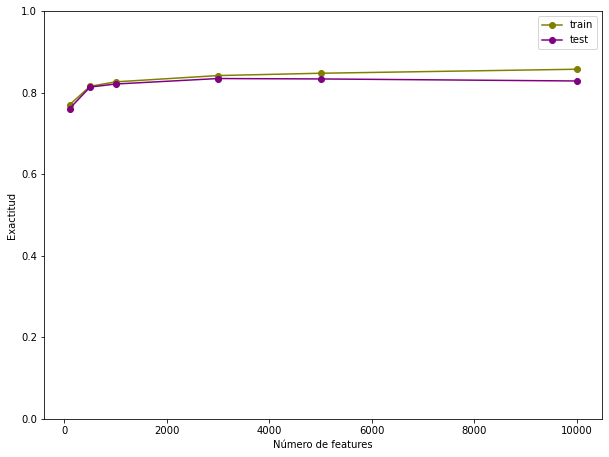

In [195]:
#Realizo el gráfico para los valores de accuracy 
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_acc_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_acc_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [196]:
winsound.Beep(freq, duration)

Como se puede observar, a partir de los 1000 features, el comportamiento del modelo es casi constante. Por lo que realizaré el mismo procedimiento, pero acotando el parámetro del número de features.

In [197]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_acc_train = []
lista_acc_test = []

# Definimos la lista de valores de max_features que vamos a explorar
n_max_features = [50, 100, 150, 200, 300, 400, 600, 800, 1000]

# Generamos en loop sobre los distintos valores de k 
for k in n_max_features:
    
    #Instacio el TfidfVectorizer
    tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = k)    

    #Entreno y transformo en TRAIN
    matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

    #Cambio el tipo de dato de la matriz 'matriz_reviews_train'
    matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

    #Transformo en DEV
    matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)
    
    #Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
    matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')
    
    #Con el dataset TRAIN determino el X_train y el y_train
    X_train = matriz_reviews_train_bin.toarray()
    y_train = label_train_bin

    #Con el dataset DEV determino el X_test y el y_test
    X_test = matriz_reviews_dev_bin.toarray()
    y_test = label_dev_bin   
    
    #Defino el modelo de LinearSVC
    svc_bin = LinearSVC(
                        dual = False, 
                        random_state= 42)
    svc_bin.fit(X_train, y_train) 
    
    #Calculo los valores predichos en TRAIN
    y_pred_train = svc_bin.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    #Calculo los valores predichos en TEST 
    y_pred_test = svc_bin.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)   
    
    # Agregar la información a las listas
    lista_acc_train.append(train_acc)
    lista_acc_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

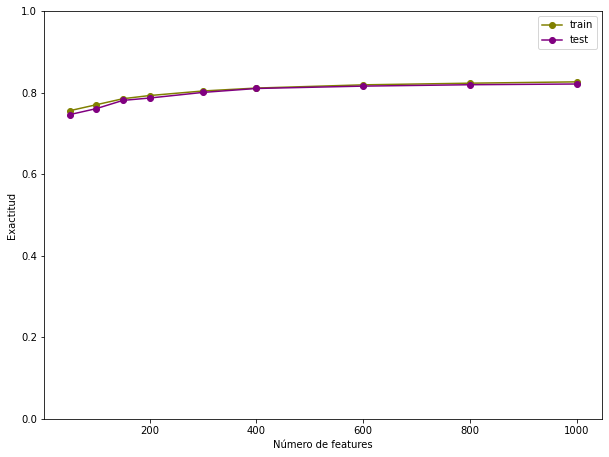

In [198]:
#Realizo el gráfico para los valores de accuracy obtenidos 
plt.figure(figsize = (10,7.5))
plt.plot(n_max_features,lista_acc_train,'o-',label='train', color = 'olive')
plt.plot(n_max_features,lista_acc_test,'o-',label='test', color = 'purple')
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Exactitud')

In [199]:
#winsound.Beep(freq, duration)

En 1000 features se da el máximo de accuracy en Test. Además, la diferencia con Train es casi nula. Por ello elegiré ese número de features a usar en el modelo de LinearSVC.

**Número de `max_features` elegido: 1000**

In [200]:
gc.collect()

40

- LinearSVC con 1000 features.

In [201]:
# Tomamos la lista de palabras y la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y la calificación para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin['label']

In [202]:
#Instanciamos 
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)


print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 1000)
(5000, 1000)


In [203]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')

- Modelado

In [204]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

In [205]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev_bin.toarray()
y_test = label_dev_bin

In [206]:
#Defino el modelo de Linear Support Vector Classification (Linear SVC)
svc_bin = LinearSVC(dual = False, 
                    random_state= 42
                   )

svc_bin.fit(X_train, y_train)

#Cross Validation
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
cv_results = cross_val_score(svc_bin, X_train, y_train, 
                 cv=cv, scoring = 'accuracy')

print('El accuracy promedio y su desvío estándar es:',cv_results.mean(),'±', cv_results.std(), '\n')
print('Los 15 accuracy son:', cv_results)

El accuracy promedio y su desvío estándar es: 0.8235299999999999 ± 0.002085369671465154 

Los 15 accuracy son: [0.82335  0.822575 0.823875 0.82745  0.82195  0.821375 0.8237   0.8258
 0.8258   0.81855  0.82405  0.82185  0.825375 0.82355  0.8237  ]


In [207]:
#Calculo los valores predichos
y_pred_test = svc_bin.predict(X_test)
y_pred_train = svc_bin.predict(X_train)

In [208]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.826465
El accuracy en Test es: 0.8212


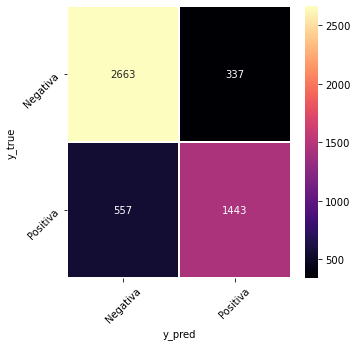

In [209]:
#Matriz de confusión para TEST
confusion_bin(y_test,y_pred_test)

In [210]:
#winsound.Beep(freq, duration)

In [211]:
gc.collect()

4157

**CONCLUSIÓN:** el accuracy para el conjunto de Train fue de 0.826 y para el conjunto de Test fue de 0.821. Predice de manera correcta un 88% de la etiqueta negativa y un 72% de la etiqueta positiva en el Test.

**CONCLUSIÓN FINAL**:  de ambos modelos que probé, sus valores de accuracy fueron muy similares. El modelo de Regresión Logística resultó ser mayor en centésimas en relación a LinearSVC. La diferencia entre el accuracy de Train y Test, es muy similar en ambos modelos. Por último, el tiempo de ejecución, es muchísimo menor usando LinearSVC (Regresión logística tiempo aproximado de 15 min; LinearSVC tiempo aproximado de 1 min). Es por ello, que entre estos dos modelos, elijo para optimizar sus hiperparámetros: **LinearSVC**.


Lo próximo que haré será realizar la optimización de sus hiperparámetros, usando un RandomizedSearchCV.

**OPTIMIZACIÓN**

Tal como comenté anteriorimente, realizaré la optimización de hiperparámetros. Los mismos los seleccioné basándoome en bibliografía y en la documentación de la librería. Ellos son:

`penalty`: {'l1', 'l2'}, predeterminado = 'l2'. Especifica la norma utilizada en la penalización.

`loss`: {'hinge', 'squared_hinge'}, predeterminado = 'squared_hinge'. Especifica la función de pérdida.

`tol`: {float}, predeterminado = 1e-4. Tolerancia a los criterios de parada.

`C`: {float}, predeterminado = 1.0. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva.

In [212]:
# Tomamos la lista de palabras y el vector que nos dice la etiqueta para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y el vector que nos dice la etiqueta para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin['label']

In [213]:
#Instanciamos el Tfidf Vectorizer
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 1000)
(5000, 1000)


In [214]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev'
matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')

- Modelado

In [215]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

In [216]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev_bin.toarray()
y_test = label_dev_bin

In [217]:
# Instancio el modelo
svc_bin_o = LinearSVC(
                        dual = False,
                        random_state= 42
                    )

#Parámetros para el RandomizedSearchCV
parameters_for_testing = {  
                            'penalty': ['l1', 'l2'],
                            'loss' : ['hinge', 'squared_hinge'],
                            'tol': [1e-2, 1e-3, 1e-4],
                            'C': [1, 5, 10]

                         }

#Instancio el modelo                    
svc_bin_rs = RandomizedSearchCV( 
                                estimator = svc_bin_o, 
                                param_distributions = parameters_for_testing, 
                                n_iter = 30, 
                                cv = 5, 
                                scoring =  'accuracy',
                                n_jobs = -1
                                )

#Entreno el modelo
svc_bin_rs.fit(X_train, y_train)

#Imprimo los mejores parámetros y el mejor score
print('Los mejores parámetros son:', svc_bin_rs.best_params_, '\n')
print('El mejor score es:', svc_bin_rs.best_score_)

Los mejores parámetros son: {'tol': 0.01, 'penalty': 'l2', 'loss': 'squared_hinge', 'C': 5} 

El mejor score es: 0.8083


In [218]:
#winsound.Beep(freq, duration)

In [219]:
#Entreno el modelo con los mejores parámetros
svc_bin_o = LinearSVC(
                      dual = False, 
                      random_state = 42,
                      penalty = svc_bin_rs.best_params_['penalty'],
                      C = svc_bin_rs.best_params_['C'],
                      loss = svc_bin_rs.best_params_['loss'],
                      tol = svc_bin_rs.best_params_['tol']
                      )

svc_bin_o.fit(X_train, y_train)

LinearSVC(C=5, dual=False, random_state=42, tol=0.01)

In [220]:
#Calculo los valores predichos
y_pred_test = svc_bin_o.predict(X_test)
y_pred_train = svc_bin_o.predict(X_train)

In [221]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.826555
El accuracy en Test es: 0.8212


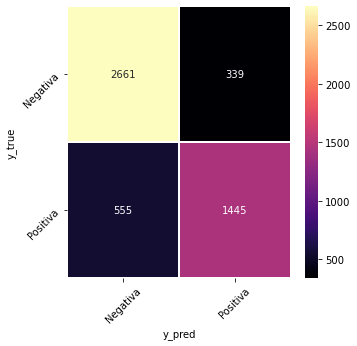

In [222]:
#Matriz de confusión para TEST
confusion_bin(y_test,y_pred_test)

In [223]:
#winsound.Beep(freq, duration)

**CONCLUSIÓN:** el accuracy para el conjunto de Train fue de 0.827 y para el conjunto de Test fue de 0.821. Predice de manera correcta un 88% de la etiqueta negativa y un 72% de la etiqueta positiva en el Test.

La optimización de hiperparámetros no resultó en un aumento de accuracy. Cabe destaca que, LinearSVC por default ya tiene un parámetro de regularización. Por otro lado, también, previamente, he seleccionado el número mas óptimo de features para el modelo. También, en general, las librerías sufren la modificación de sus valores por default haciéndolos mas óptimos. Por estas cosas, es interpretable que el modelo otimizado no presentó una mejora de la métrica, respecto a sus valores por default.

Aunque los resultados fueron iguales, decidí utilizar los valores salidos de la optimización para probar la validación del modelo con el dataset TEST.

In [224]:
gc.collect()

4162

**Modelo a probrar con el set TEST**

A continuación probaré el mejor modelo optimizado contra el dataset TEST, el cual no utilicé aún. Esta es una manera de validar el modelo.

In [225]:
# Tomamos la lista de palabras y el vector que nos dice la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin['label']

# Tomamos la lista de palabras y el vector que nos dice la calificación para TEST
lista_reviews_test_bin = list(dataset_test_bin['clean'].values)
label_test_bin = dataset_test_bin['label']

#Instanciamos
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 1000)

#Entreno y transformo en Train
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en Test
matriz_reviews_test_bin = tfidf_bin.transform(lista_reviews_test_bin)

all_words_bin = tfidf_bin.get_feature_names()

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_test_bin.shape)

(200000, 1000)
(5000, 1000)


In [226]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_test'
matriz_reviews_test_bin = matriz_reviews_test_bin.astype('float32')

- Modelado

In [227]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

In [228]:
#Con el dataset TEST determino el X_test y el y_test
X_test = matriz_reviews_test_bin.toarray()
y_test = label_test_bin

In [229]:
#Entreno el modelo con los mejores parámetros
svc_test_o = LinearSVC(
                      dual = False, 
                      random_state = 42,
                      penalty = 'l2',
                      C = 5,
                      loss = 'squared_hinge',
                      tol = 0.01
                      )

svc_test_o.fit(X_train, y_train)

LinearSVC(C=5, dual=False, random_state=42, tol=0.01)

In [230]:
#Calculo los valores predichos
y_pred_test = svc_test_o.predict(X_test)
y_pred_train = svc_test_o.predict(X_train)

In [231]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.826555
El accuracy en Test es: 0.8276


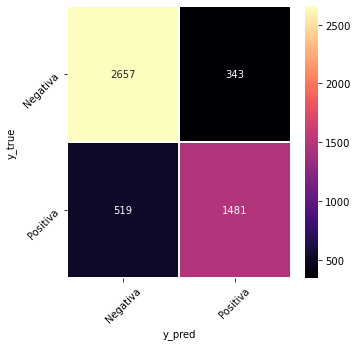

In [232]:
#Matriz de confusión para TEST
confusion_bin(y_test,y_pred_test)

In [233]:
#winsound.Beep(freq, duration)

**CONCLUSIÓN FINAL**: La validación del modelo en el dataset TEST cuyos parámetros fueron optimizados, resultó en un aumento en milésimas (0.007) del accuracy en Test (0.827) y resultó invariable para el conjunto Train (0.828). Esto quiere decir, que el modelo, al ser probado con datos que nunca ha visto (ni para entrenar ni para optimizar sus hiperpámetros) resulta en un buen modelo (su accuracy no desciende). Además, aumentó la predicción de la etiqueta positiva a 74% (la etiqueta negativa se mantuvo en 88%) en el Test.

In [234]:
gc.collect()

4157

**¿Qué información está usando el modelo para predecir?**

A continuación graficaré los 20 features mas importante (los primeros 10 positivos y los primeros 10 negativos).

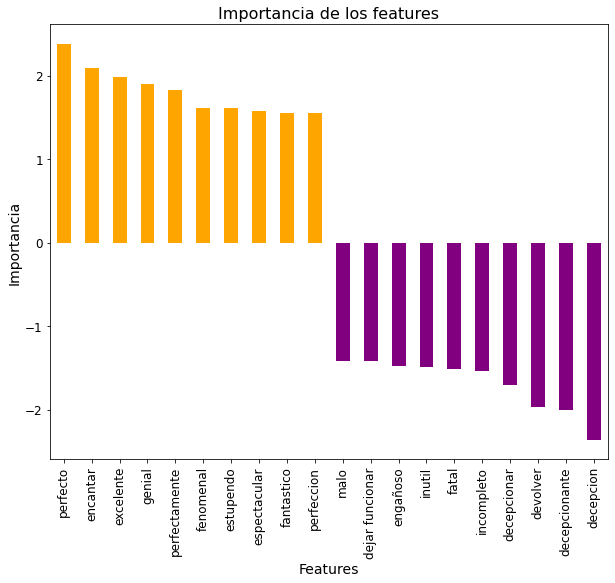

In [235]:
coeff = list(svc_test_o.coef_[0])
labels = list(all_words_bin)

features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features = features.reset_index(drop=True)
features_sort = features.sort_values(by=['Importance'], ascending=False)
features_sort = features_sort.reset_index(drop=True)

data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
data_plot.sort_values(by=['Importance'], ascending=False, inplace = True)
data_plot['positive'] = data_plot['Importance'] > 0
data_plot.set_index('Features', inplace = True)
data_plot.Importance.plot(kind='bar', figsize = (10,8), 
                          color = data_plot.positive.map({True: 'orange', False: 'purple'}),
                          fontsize=12)
    
plt.xlabel ('Features', fontsize=14)
plt.ylabel ('Importancia', rotation = 90, fontsize=14)
plt.title ('Importancia de los features', fontsize=16)
plt.show()

**CONCLUSIÓN**: los features con importancia positiva fueron: perfecto, encantar, genial, excelente, perfectamente, estupendo, perfección, fantástico, sorprender y contento. 
Los features con mayor importancia negativa fueron: decepción, decepcionante, devolver, inútil, descontentar, incmpleto, dinero tirar, estafar engañoso  y decepcionar.

Cabe descatacar que en ambos casos, todas son palabras muy claves y muy claras para cada una de las clases (positivas y negativas), es decir, son palabras o bloques de palabras (en el caso del bigrama) que al leerlas tienen connotación positiva o negativa bien definiva, haciendo que la clasificación sea de mayor exactitud.

**CONCLUSIÓN GENERAL**: la aproximación binaria aumentó la exactitud en un 65% aproximadamente. 

### COMPARANDO LOS 3 MODELOS

Sólo a modo de comparación, se puede observar la mejora en el accuracy en cada una de las aproximaciones (benchmark, multiclase (5 estrellas) y binaria).

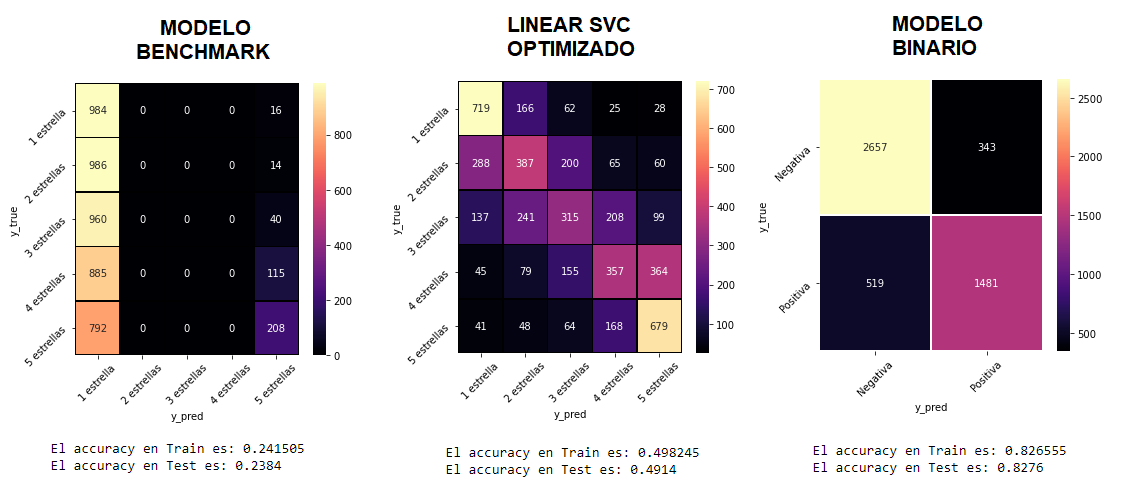

## 2. ¿Hay algo que te gustaría investigar o probar?

Leyendo para poder resolver el proyecto, me encontré con algo que se llama `Análisis de sentimientos`.


Particularmente, me llamó mucho la atención, ya que en la mayoría de los proyectos de NLP lo usaban. 

Uno de los primero problemas con los que me encontré fue, que era difícil encontrar un Análisis de sentimientos para el idioma español, dado que la mayoría estaban hechos y optimizados para el idioma inglés. 

La primer opción, fue entonces, intentar traducir los comentarios. Probé varias alternativas..

Investigando encontré la librería `sentiment-spanish`. Es una librería de Python que utiliza redes neuronales convolucionales para predecir el sentimiento de las oraciones en español. El modelo fue entrenado utilizando más de 800000 reseñas de usuarios de las páginas `eltenedor`, `decathlon`, `tripadvisor`, `filmaffinity` y `ebay`. Estas revisiones se extrajeron mediante web scraping con el proyecto opinion-reviews-scraper

Utilizando la tasa en las reseñas de los usuarios, se entrenó al modelo para que aprendiera del idioma en ellos. Para eso se usaron las bibliotecas Keras y Tensorflow. Se logró una precisión de validación (precisión sobre datos nuevos, no utilizados para entrenamiento) del 88%.

La función devuelve un número entre 0 y 1. Esta es la probabilidad de que el texto sea "positivo". Las probabilidades bajas significan que el texto es negativo (números cercanos a 0), las probabilidades altas (números cercanos a 1) significan que el texto es positivo. El espacio intermedio corresponde a textos neutros.

**Por ello decidí probar con esta librería y ver que sucedía en la predicción de las 5 estrellas.**

**NOTA**: quiero aclarar que esta parte del proyecto, la realicé a modo de prueba, por lo que solo trabajé con el dataset TRAIN y DEV. Tampoco realicé la optimización de hiperparámetros de los modelos (trabajé con sus parámetros por default).

**NOTA 2**: no utilicé la misma data con la que venía trabajando, ya que en este caso, decidí **no eliminar emojis**, así como tampoco los signos de puntuación **¡!**.  

In [236]:
#Cargo el dataset TRAIN
dataset_train = pd.read_json('dataset_es_train.json', lines=True)
print(dataset_train.shape)
dataset_train.head()

(200000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [237]:
#Cargo el dataset DEV
dataset_dev = pd.read_json('dataset_es_dev.json', lines=True)
print(dataset_dev.shape)
dataset_dev.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


- Columnas a usar 

Decidí fusionar la información contenida en `review_title` y en `review_body` para poseer todo el texto junto y poder realizar el análisis conjunto de toda la información contenida en ellos.

In [238]:
#Combinar el texto en una sola columna:review_data y review_body en review_title_body para TRAIN
dataset_train['review_title_body']  = dataset_train['review_title']+' '+dataset_train['review_body']
del dataset_train['review_id']
del dataset_train['product_id']
del dataset_train['reviewer_id']
del dataset_train['review_body']
del dataset_train['review_title']
del dataset_train['language']
del dataset_train['product_category']

dataset_train

,stars,review_title_body
0,1,television Nevir Nada bueno se me fue ka panta...
1,1,Dinero tirado a la basura con esta compra Horr...
2,1,solo llega una unidad cuando te obligan a comp...
3,1,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,Devuelto Llega tarde y co la talla equivocada
...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...
199996,5,Funciona perfectamente Compré la batería con c...
199997,5,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,Recomendado Perfecto para el cumple de mi hijo


In [239]:
#Combinar el texto en una sola columna:review_data y review_body en review_title_body para DEV
dataset_dev['review_title_body']  = dataset_dev['review_title']+' '+dataset_dev['review_body']
del dataset_dev['review_id']
del dataset_dev['product_id']
del dataset_dev['reviewer_id']
del dataset_dev['review_body']
del dataset_dev['review_title']
del dataset_dev['language']
del dataset_dev['product_category']

- Elimino los números 

En el dataset, solo quería quedarme con palabras, por lo que la existencia de números consideraba que no iban a aportar información y por ello los quité.

In [240]:
no_number_train=[]
for review in dataset_train.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü¡!]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_train.append(review)

In [241]:
dataset_train['review_title_body'] = no_number_train

In [242]:
no_number_dev=[]
for review in dataset_dev.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü¡!]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_dev.append(review)

In [243]:
dataset_dev['review_title_body'] = no_number_dev

- Llevo a minúsculas, elimino puntuaciones, elimino `stop words`y hago la lemmatización. 

**NOTA :** el modelo que decidí utlizar de la librería spaCy es 'es_core_news_lg'.

In [244]:
#Función patra llevar a minúsculas, eliminar stopwords, puntuaciones y lemmatizar

nlp = spacy.load('es_core_news_lg')

def normalize(comment, lowercase, remove_stopwords):
    
    punctuations = string.punctuation
    stops = spacy.lang.es.stop_words.STOP_WORDS
    non_stops = ['bueno','buena', '¡', '!']
    otros = ['y', 'e', 'a', 'o', 'para', 'pare', 'paro', 'como', 'q','..','...','....', '.....','.......', '...........','¡','¿']

    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if word.text not in non_stops:
            if not remove_stopwords or (remove_stopwords and word.text not in stops): 
                if word.text not in punctuations:
                    if word.text not in otros:
                        lemma = word.lemma_.strip()
                        lemmatized.append(lemma)
        elif word.text in non_stops:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
            
    return " ".join(lemmatized)

In [245]:
#Aplico la función normalize para TRAIN y creo la columna clean
dataset_train['clean'] = dataset_train['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)
dataset_train

,stars,review_title_body,clean
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar
...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar batería retice...
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo


In [246]:
#Aplico la función normalize para DEV y creo la columna clean
dataset_dev['clean'] = dataset_dev['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)

In [247]:
winsound.Beep(freq, duration)

- Cambio vocales con acento por vocales sin acento

In [248]:
#Quito los acentos al dataset TRAIN
dataset_train['clean'] = dataset_train['clean'].str.replace(u"á", "a")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"é", "e")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"í", "i")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ó", "o")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ú", "u")

In [249]:
#Quito los acentos al dataset DEV
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"á", "a")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"é", "e")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"í", "i")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ó", "o")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ú", "u")

- Defino el modelo para hacer el Análisis de Sentimientos

In [250]:
#Instancio el modelo
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [251]:
#Defino el dataset TRAIN y hago el análisis de sentimientos
dataset_train = dataset_train.copy()
dataset_train['sent_value'] = dataset_train['clean'].apply(sentiment.sentiment)
dataset_train

,stars,review_title_body,clean,sent_value
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,4.884553e-01
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,7.143558e-08
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,8.293218e-08
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,4.098888e-06
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,1.878516e-02
...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,4.162305e-01
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,3.412766e-02
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,9.988392e-01
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,9.977067e-01


In [252]:
#Defino el dataset DEV y hago el análisis de sentimientos
dataset_dev = dataset_dev.copy()
dataset_dev['sent_value'] = dataset_dev['clean'].apply(sentiment.sentiment)
dataset_dev

,stars,review_title_body,clean,sent_value
0,1,Mala compra Malisimo muy grande demasiado apar...,malo comprar malisimo grande aparatoso protect...,0.000692
1,1,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolucion,0.447364
2,1,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...,0.102122
3,1,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diametr...,0.192381
4,1,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor viejo aspecto malo,0.000045
...,...,...,...,...
4995,5,guadalupe Me ha encantado la cesta Ha llegado ...,guadalupe encantar cesta llegar impecable tama...,0.975409
4996,5,calidad precio Desempeña su función correctamente,calidad preciar desempeñar funcion correctamente,0.506570
4997,5,Excelente Me ha encantado la diadema! Las flor...,excelente encantar diadema ! flor venir imagen...,0.824269
4998,5,Genial A mi me gustan mucho las fundas TPU ya ...,genial gustar fundir tpu fundir normalmente fi...,0.773362


- Incorporo columna ya obtenida en datasets anteriores (`label`)

In [253]:
#Incorporo la columna 'label' 
dataset_train['label'] = dataset_train_bin['label']
dataset_train

,stars,review_title_body,clean,sent_value,label
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,4.884553e-01,negativa
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,7.143558e-08,negativa
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,8.293218e-08,negativa
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,4.098888e-06,negativa
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,1.878516e-02,negativa
...,...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,4.162305e-01,positiva
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,3.412766e-02,positiva
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,9.988392e-01,positiva
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,9.977067e-01,positiva


In [254]:
#Incorporo la columna 'label' 
dataset_dev['label'] = dataset_dev_bin['label']
dataset_dev

,stars,review_title_body,clean,sent_value,label
0,1,Mala compra Malisimo muy grande demasiado apar...,malo comprar malisimo grande aparatoso protect...,0.000692,negativa
1,1,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolucion,0.447364,negativa
2,1,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...,0.102122,negativa
3,1,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diametr...,0.192381,negativa
4,1,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor viejo aspecto malo,0.000045,negativa
...,...,...,...,...,...
4995,5,guadalupe Me ha encantado la cesta Ha llegado ...,guadalupe encantar cesta llegar impecable tama...,0.975409,positiva
4996,5,calidad precio Desempeña su función correctamente,calidad preciar desempeñar funcion correctamente,0.506570,positiva
4997,5,Excelente Me ha encantado la diadema! Las flor...,excelente encantar diadema ! flor venir imagen...,0.824269,positiva
4998,5,Genial A mi me gustan mucho las fundas TPU ya ...,genial gustar fundir tpu fundir normalmente fi...,0.773362,positiva


- Tokenizado y recuento de tokens

Lo hago de nuevo, ya que el número de tokens, con las nuevas condiciones de limpieza del dataset pueden variar.

In [255]:
#Función para tokenizar y generar una lista con las palabras tokenizadas
def tokenizar_lista(data):
    nombre_lista = []
    for i in range(data.shape[0]):
        token = data.iloc[i].clean
        token = nlp(token) 
        nombre_lista.append(token)
    return nombre_lista

In [256]:
#Aplico tokenizar_lista en TRAIN
lista_token_train = tokenizar_lista(dataset_train)

In [257]:
#Aplico tokenizar_lista en DEV
lista_token_dev = tokenizar_lista(dataset_dev)

In [258]:
#Creo la columna token en TRAIN
dataset_train['token'] = lista_token_train
dataset_train

,stars,review_title_body,clean,sent_value,label,token
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,4.884553e-01,negativa,"(television, nevir, bueno, ka, pantalla, mesar..."
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,7.143558e-08,negativa,"(dinero, tirar, basura, comprar, horrible, ten..."
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,8.293218e-08,negativa,"(llegar, unidad, obligar, comprar, obligar, co..."
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,4.098888e-06,negativa,"(producto, recibir, entrar, descalificar, vend..."
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,1.878516e-02,negativa,"(devolver, llegar, co, tallar, equivocar)"
...,...,...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,4.162305e-01,positiva,"(describir, mandar, funcionar, perfectamente, ..."
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,3.412766e-02,positiva,"(funcionar, perfectamente, comprar, bateria, r..."
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,9.988392e-01,positiva,"(bueno, calidad, bueno, calidad, satisfacer, c..."
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,9.977067e-01,positiva,"(recomendar, perfecto, cumplir, hijo)"


In [259]:
#Creo la columna token en DEV
dataset_dev['token'] = lista_token_dev

In [260]:
# Sumo el número de tokens y los almaceno en una columna llamada num_tokens
dataset_train['num_tokens'] = [len (token) for token in dataset_train.token]
dataset_train

,stars,review_title_body,clean,sent_value,label,token,num_tokens
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla mesar recib...,4.884553e-01,negativa,"(television, nevir, bueno, ka, pantalla, mesar...",9
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,7.143558e-08,negativa,"(dinero, tirar, basura, comprar, horrible, ten...",12
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,8.293218e-08,negativa,"(llegar, unidad, obligar, comprar, obligar, co...",15
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto recibir entrar descalificar vendedor ...,4.098888e-06,negativa,"(producto, recibir, entrar, descalificar, vend...",24
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,1.878516e-02,negativa,"(devolver, llegar, co, tallar, equivocar)",5
...,...,...,...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,4.162305e-01,positiva,"(describir, mandar, funcionar, perfectamente, ...",14
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,3.412766e-02,positiva,"(funcionar, perfectamente, comprar, bateria, r...",14
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,9.988392e-01,positiva,"(bueno, calidad, bueno, calidad, satisfacer, c...",6
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,9.977067e-01,positiva,"(recomendar, perfecto, cumplir, hijo)",4


In [261]:
# Sumo el número de tokens y los almaceno en una columna llamada num_tokens
dataset_dev['num_tokens'] = [len (token) for token in dataset_dev.token]

- Defino los datasets Train y Test

In [262]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = dataset_train.iloc[:,[3,6]]
y_train = dataset_train.iloc[:,[0]]
print(X_train.columns, y_train.columns)

Index(['sent_value', 'num_tokens'], dtype='object') Index(['stars'], dtype='object')


In [263]:
#Con el dataset DEV determino el X_test y el y_test
X_test = dataset_dev.iloc[:,[3,6]]
y_test = dataset_dev.iloc[:,[0]]
print(X_test.columns, y_test.columns)

Index(['sent_value', 'num_tokens'], dtype='object') Index(['stars'], dtype='object')


-Probaré un modelo de Linear Support Vector Classification (Linear SVC)

In [264]:
# Instancio el modelo
svc_bin_sa = LinearSVC(
                        dual = False,
                        random_state= 42
                    )

#Entreno el modelo
svc_bin_sa.fit(X_train, y_train)

LinearSVC(dual=False, random_state=42)

In [265]:
#Calculo los valores predichos
y_pred_test = svc_bin_sa.predict(X_test)
y_pred_train = svc_bin_sa.predict(X_train)

In [266]:
#Calculo el accuracy en Train y test
print('El accuracy en Train es:', accuracy_score(y_train, y_pred_train))
print('El accuracy en Test es:', accuracy_score(y_test, y_pred_test))

El accuracy en Train es: 0.307405
El accuracy en Test es: 0.311


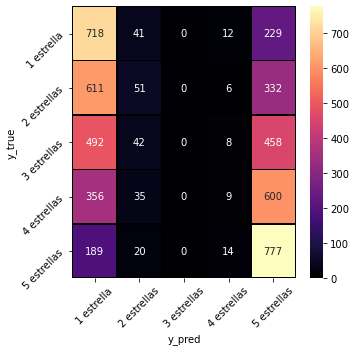

In [267]:
#Matriz de confusión para TEST
confusion_5_stars(y_test,y_pred_test)

In [268]:
winsound.Beep(freq, duration)

**CONCLUSIÓN**: el accuracy resultó en  0.307 para Train y 0.311 para Test. Las mejores predicciones resultaron para las estrellas 1 y 5, mientras que para el resto de las estrellas fue muy mala la clasificación. Cabe destacar que ninguna estrella 3, fue clasificada de manera correcta.

**CONCLUSIÓN FINAL**: El Análisis de sentimientos, puede llegar a ser muy útil al momento de evaluar comentarios, es por ello, que me parecía que era un buen punto para investigar. 

En ambos casos, la exactitud resultó mas baja que utilizando los features a través del vectorizado de los comentarios. Hay que tener en cuenta, que esta librería utilizada, tal como lo describí anteriomente está basada en redes convolucionaes usando reseñas de varios sitios web. Aclaran también que se logró una precisión de validación (precisión sobre datos nuevos, no utilizados para entrenamiento) del 88%. 

Esta librería funcionó de muy buena manera con el dataset del proyecto, aclarando nuevamente que ya declaraban una exactitud del 88%.

Tal vez, una opción para poder mejorar la predicción usando Análisis de sentimientos, sería la traducción y utilización de alguna librería mas optimizada, como VADER, por ejemplo. En este caso, se debería tener en cuenta los costos en los que entraríamos en la traducción.

## Y AHORA...¿CÓMO CONTINUARÍA ESTE PROYECTO A FUTURO?

Pensando a futuro creo que podría pensar en proponer una mejora en el modelo binario (obtenido utilizando la vectorización de los comentarios). 

Esto no queda acá! Nos vemos en el Proyecto 4!